<a href="https://colab.research.google.com/github/mattderri/LabII/blob/main/SmartAbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from scipy.optimize import curve_fit as fit
from scipy.stats import describe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def leggi_file(file_in):
  file_out=open('Output.dat','w')
  file_in=open(file_in)

  lines=[]
  for line in file_in:
    lines.append(line)
  for i in range(len(lines)):
    if (lines[i].startswith('==')==False):
      file_out.write("%s\n" %lines[i])

  file_out.close()

  data=pd.read_csv(file_out.name,delim_whitespace=True,header=None)

  return(data)

#Dark Counts


## No Telo

### Dark counts scheda sinistra (presa dati del 21/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/Dark_counts_scheda_sinistra.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#I canali 0,1,2,4,5 hanno conteggi totalmente sballati e li ho esclusi dal plot

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(5,12):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.xlabel('Tensione [V]',fontsize=18)
  plt.legend(loc=2, prop={'size': 16})

plt.show()

#plt.savefig('Scheda_sinistra.pdf')

### Dark counts $V_{th}=3\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_Vth3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

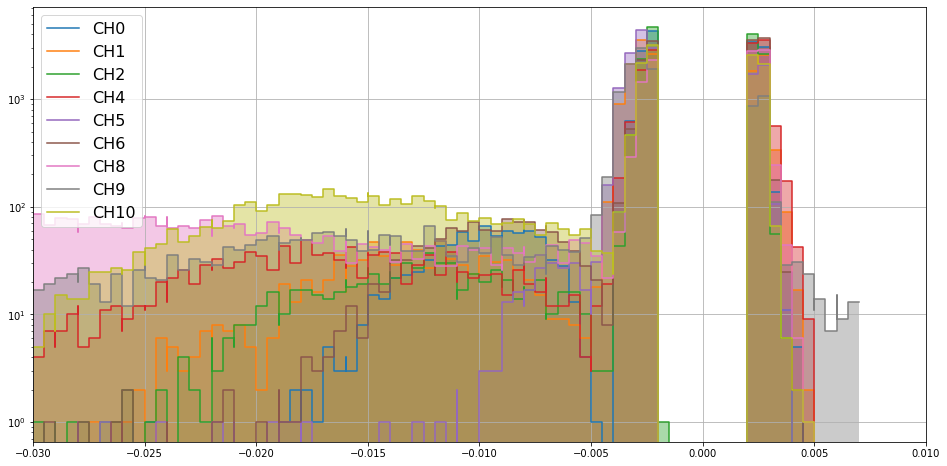

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth3mv.pdf')

### Dark counts $V_{th}=4\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_brutti_Vth4mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.050,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth4mv.pdf')

### Dark counts scheda sinistra (presa dati del 24/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Histo_all_sx.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

## Telo

### Scheda sinistra

#### Treshold a 3 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

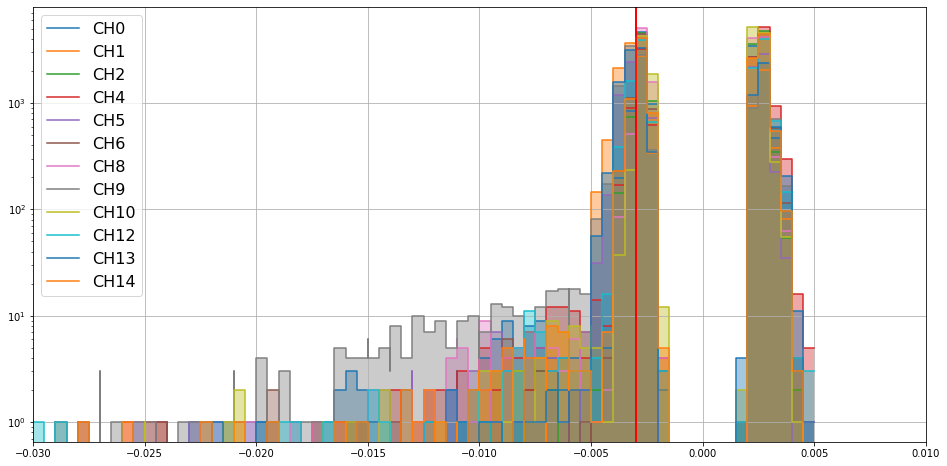

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.003,color='red')

#plt.show()
plt.savefig("DarkCountsSx_3mV.pdf")

#### Treshold a 6 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_6mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

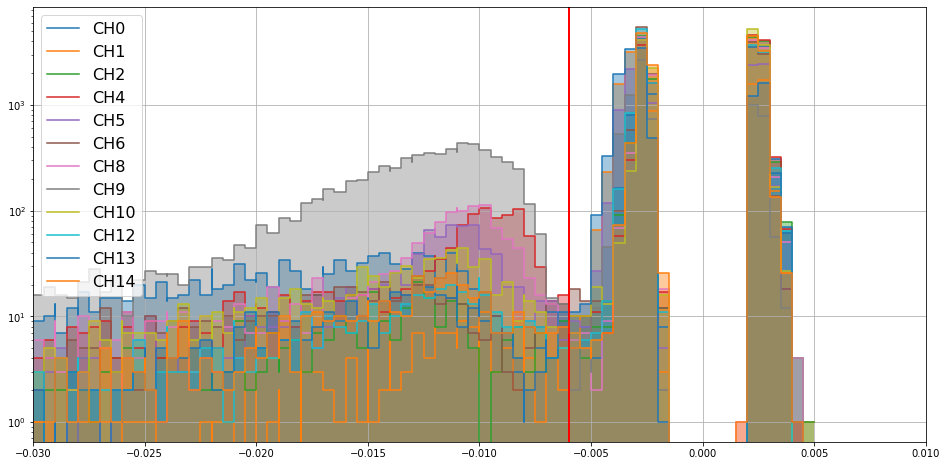

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.006,color='red')

#plt.show()
plt.savefig("DarkCountsSx_6mV.pdf")

#### Treshold a 9 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_9mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

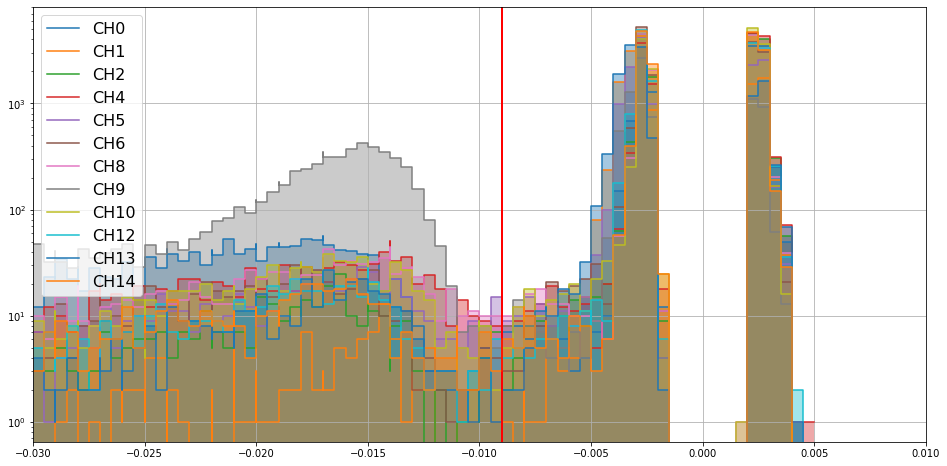

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.009,color='red')

#plt.show()
plt.savefig("DarkCountsSx_9mV.pdf")

#### Treshold a 12 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_12mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

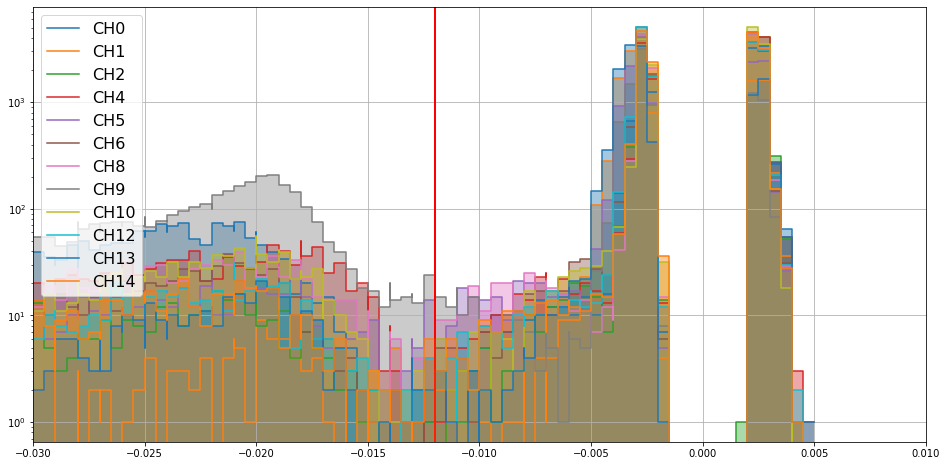

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.012,color='red')

#plt.show()
plt.savefig("DarkCountsSx_12mV.pdf")

#### Treshold a 15 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_15mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

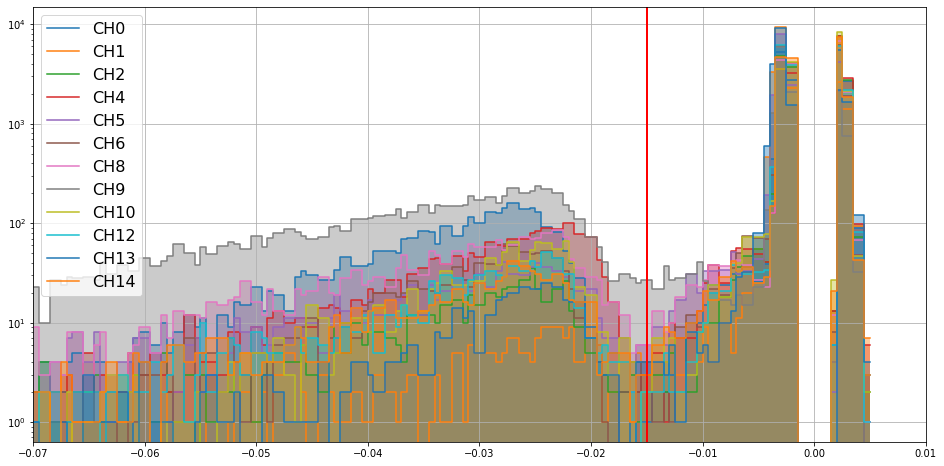

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsSx_15mV.pdf")

#### Treshold a 20 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_20mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

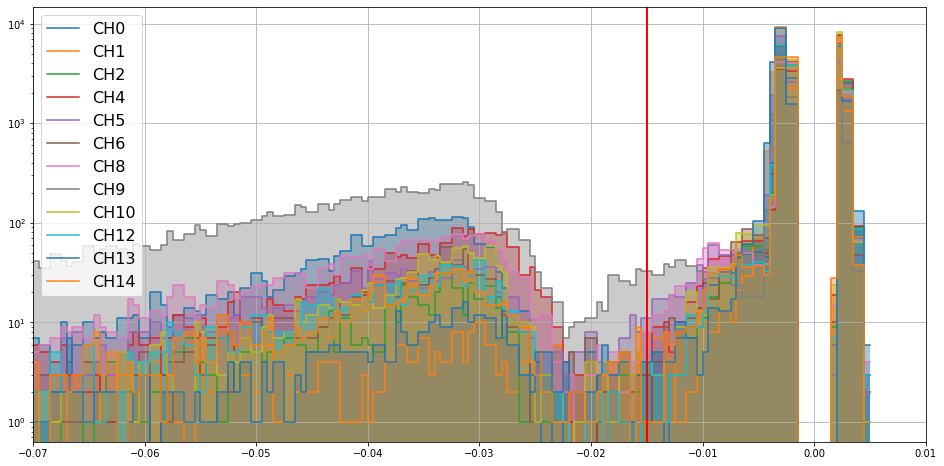

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsSx_20mV.pdf")

#### Totale

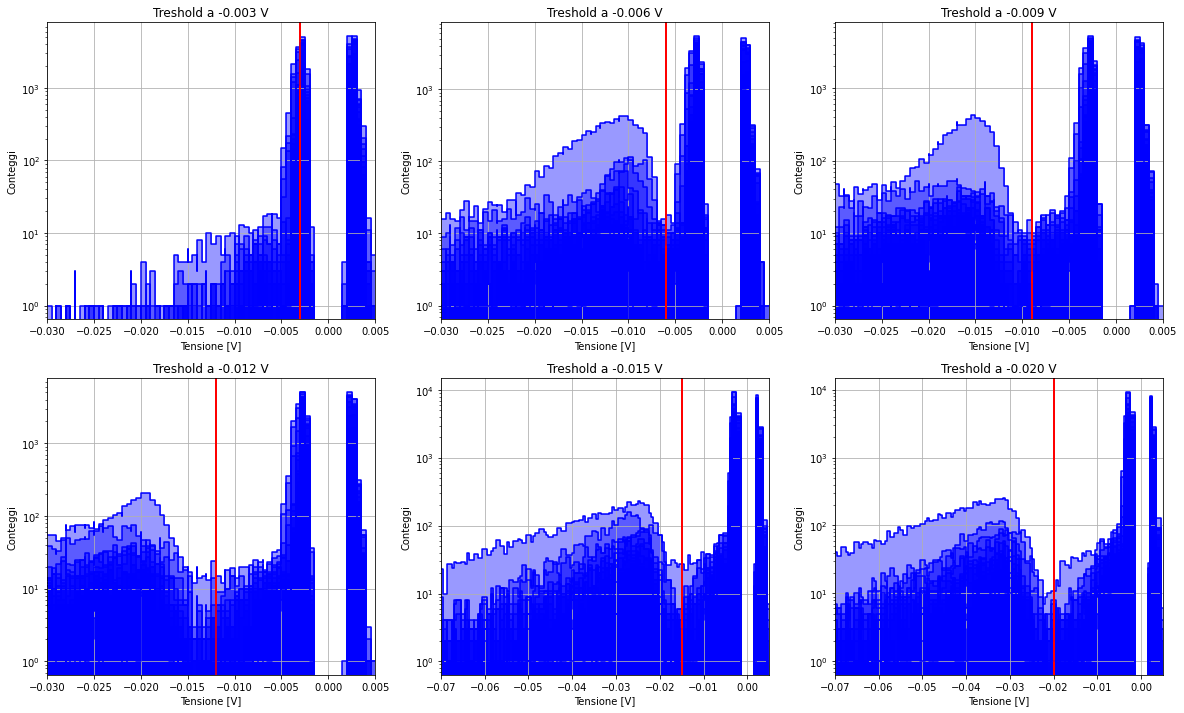

In [ ]:
file=["/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_3mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_6mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_9mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_12mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_15mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_20mV.dat"]

treshold=[-0.003,-0.006,-0.009,-0.012,-0.015,-0.020]

column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

fig,axes=plt.subplots(2,3,sharey=False,figsize=(20,12))

j=0

for i in range(len(file)):
  if(i==3):
    j=1

  data=leggi_file(file[i])
  data=data.transpose()
  data.columns=[column_names[k] for k in range(len(column_names))]

  canali={key:[] for key in canale}
  occ={key:[] for key in occorrenze}

  for l in canale:
    canali[l]=data[l].values
    canali[l]=canali[l].flatten(order='F')

  for m in occorrenze:
    occ[m]=data[m].values
    occ[m]=occ[m].flatten(order='F')

  for n in range(len(canale)):

    if(i<4):
      axes[j,i%3].set_xlim(-0.030,0.005)
    if(i>=4):
      axes[j,i%3].set_xlim(-0.070,0.005)

    axes[j,i%3].fill_between(canali[canale[n]],occ[occorrenze[n]],step="mid",color='blue',alpha=0.4)
    axes[j,i%3].semilogy(canali[canale[n]],occ[occorrenze[n]],drawstyle="steps-mid",color='blue')
    axes[j,i%3].set_xlabel("Tensione [V]")
    axes[j,i%3].set_ylabel("Conteggi")
    axes[j,i%3].axvline(x=treshold[i],color='red')
    axes[j,i%3].set_title("Treshold a {:.3f} V".format(treshold[i]))
    axes[j,i%3].grid(True)
fig.savefig("DarkCountsTotalSx.pdf")

### Scheda destra

#### Treshold a 3 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

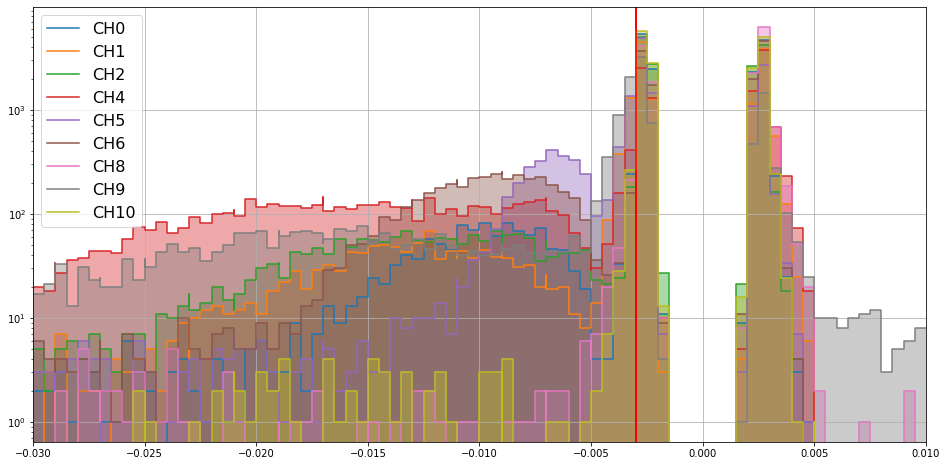

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.003,color='red')

#plt.show()
plt.savefig("DarkCountsDx_3mV.pdf")

#### Treshold a 6 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_6mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

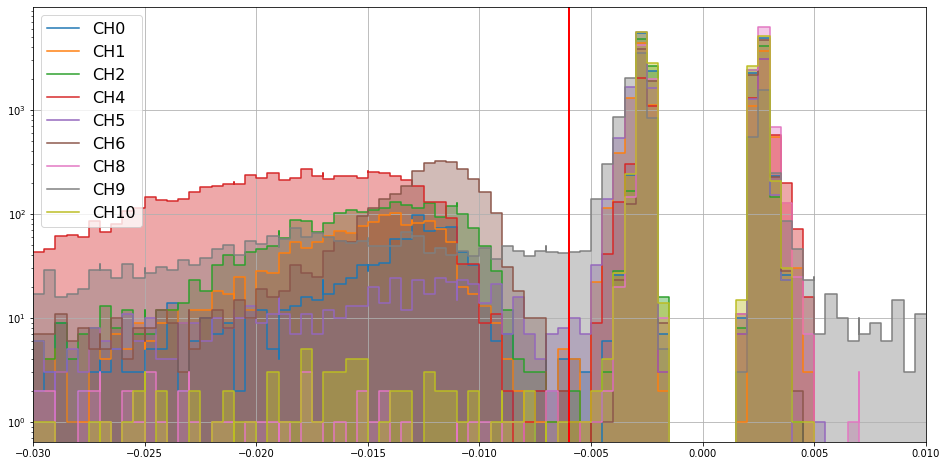

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.006,color='red')

#plt.show()
plt.savefig("DarkCountsDx_6mV.pdf")

#### Treshold a 9 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_9mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

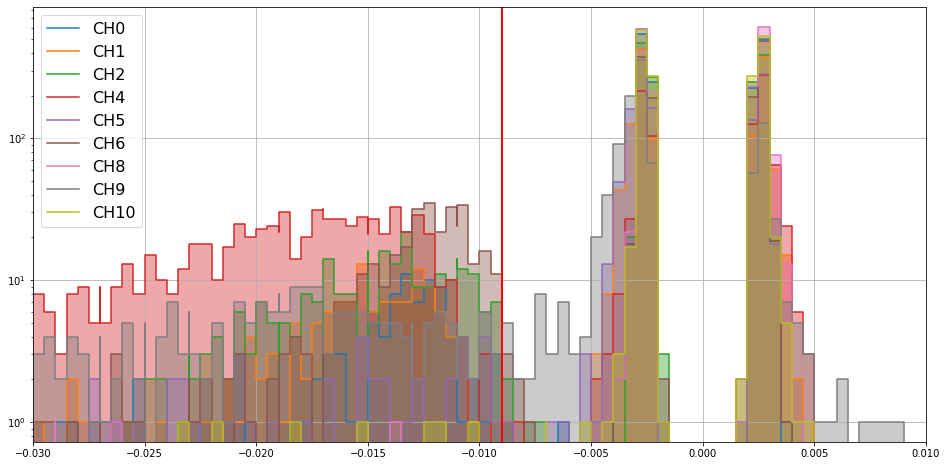

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.009,color='red')

#plt.show()
plt.savefig("DarkCountsDx_9mV.pdf")

#### Treshold a 12 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_12mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

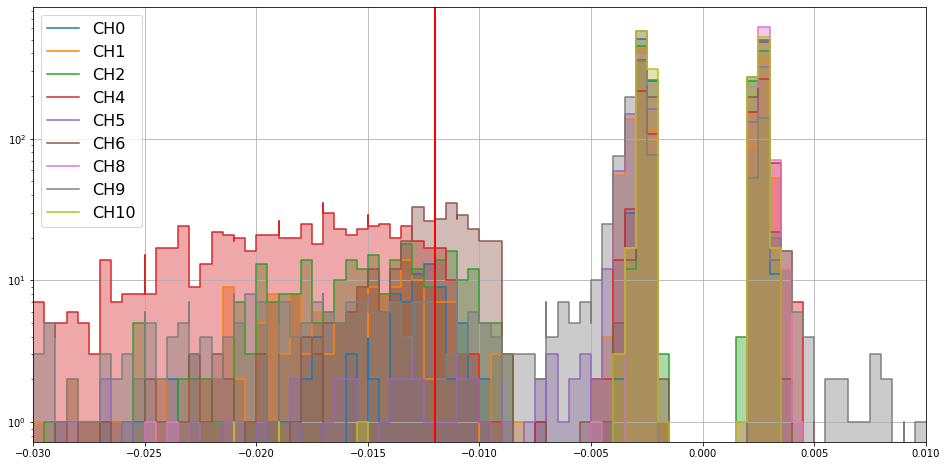

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.012,color='red')

#plt.show()
plt.savefig("DarkCountsDx_12mV.pdf")

#### Treshold a 15 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_15mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

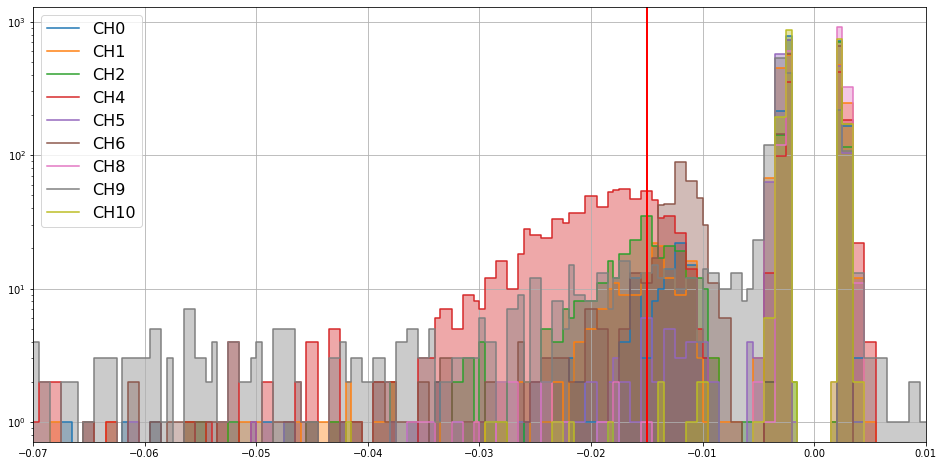

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsDx_15mV.pdf")

#### Treshold a 20 mV

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_20mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

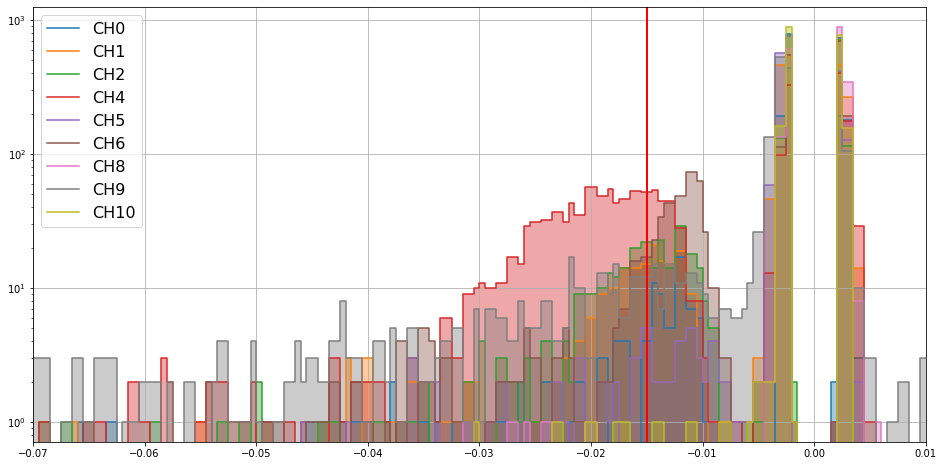

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsDx_20mV.pdf")

#### Totale

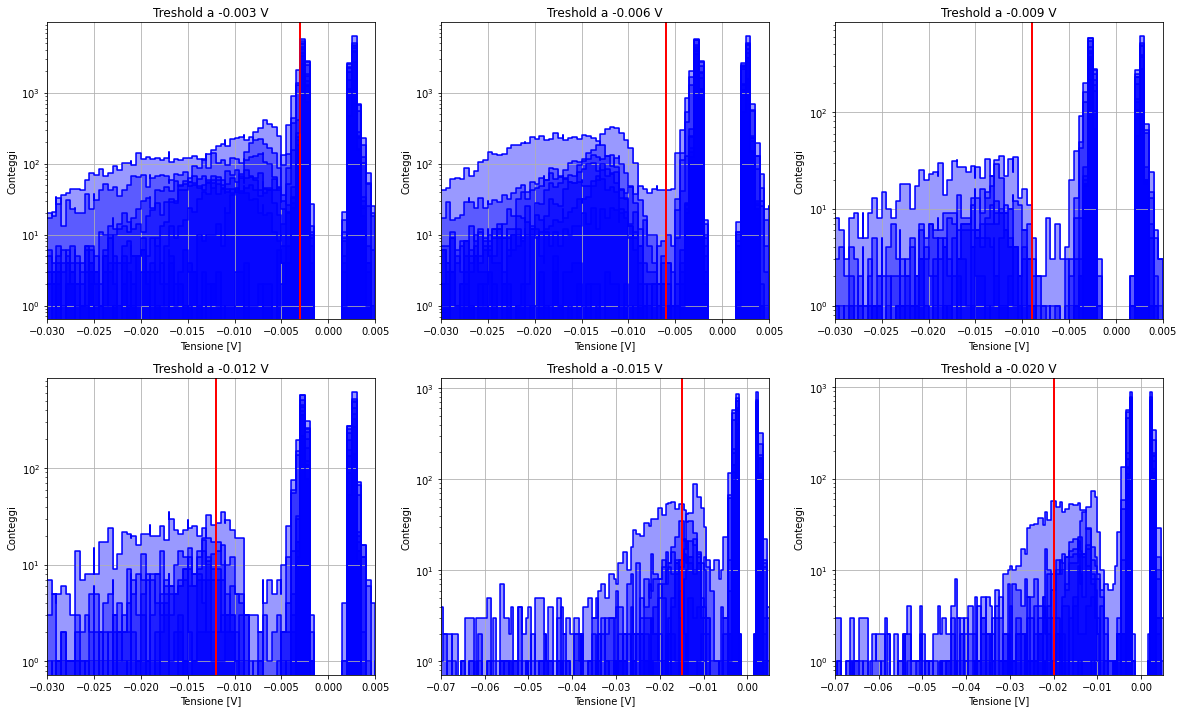

In [ ]:
file=["/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_3mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_6mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_9mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_12mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_15mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_20mV.dat"]

treshold=[-0.003,-0.006,-0.009,-0.012,-0.015,-0.020]

column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

fig,axes=plt.subplots(2,3,sharey=False,figsize=(20,12))

j=0

for i in range(len(file)):
  if(i==3):
    j=1

  data=leggi_file(file[i])
  data=data.transpose()
  data.columns=[column_names[k] for k in range(len(column_names))]

  canali={key:[] for key in canale}
  occ={key:[] for key in occorrenze}

  for l in canale:
    canali[l]=data[l].values
    canali[l]=canali[l].flatten(order='F')

  for m in occorrenze:
    occ[m]=data[m].values
    occ[m]=occ[m].flatten(order='F')

  for n in range(len(canale)):

    if(i<4):
      axes[j,i%3].set_xlim(-0.030,0.005)
    if(i>=4):
      axes[j,i%3].set_xlim(-0.070,0.005)

    axes[j,i%3].fill_between(canali[canale[n]],occ[occorrenze[n]],step="mid",color='blue',alpha=0.4)
    axes[j,i%3].semilogy(canali[canale[n]],occ[occorrenze[n]],drawstyle="steps-mid",color='blue')
    axes[j,i%3].set_xlabel("Tensione [V]")
    axes[j,i%3].set_ylabel("Conteggi")
    axes[j,i%3].axvline(x=treshold[i],color='red')
    axes[j,i%3].set_title("Treshold a {:.3f} V".format(treshold[i]))
    axes[j,i%3].grid(True)
fig.savefig("DarkCountsTotalDx.pdf")

# Rate


## Analisi della prima presa dati "Rates.dat" - 101 punti

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Rates.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

In [ ]:
mean_rates = np.mean(data[labels])
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = np.sqrt(mean_rates)
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[labels[i]]))

Rate di coincidenze canali 0-1-2 :		0.795 +/- 0.892 Hz
Rate di coincidenze canali 0-1 :		1.295 +/- 1.138 Hz
Rate di coincidenze canali 1-2 :		1.135 +/- 1.066 Hz
Rate di coincidenze canali 0-2 :		1.116 +/- 1.056 Hz
Rate di coincidenze canali 4-5-6 :		1.095 +/- 1.046 Hz
Rate di coincidenze canali 4-5 :		3.833 +/- 1.958 Hz
Rate di coincidenze canali 5-6 :		2.382 +/- 1.543 Hz
Rate di coincidenze canali 4-6 :		1.523 +/- 1.234 Hz
Rate di coincidenze canali 8-9-10 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 8-9 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 9-10 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 8-10 :		1.550 +/- 1.245 Hz
Rate di coincidenze canali 12-13-14 :		1.204 +/- 1.097 Hz
Rate di coincidenze canali 12-13 :		1.752 +/- 1.324 Hz
Rate di coincidenze canali 13-14 :		1.866 +/- 1.366 Hz
Rate di coincidenze canali 12-14 :		1.740 +/- 1.319 Hz


In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[4*i]*err_rates[4*i+j]/mean_rates[4*i+j]**2)**2 + (err_rates[4*i]**2/mean_rates[4*i+j])**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f}".format(PMT_number[3*i+j-1], PMT_label[j-1], eff, err))
    triplet_counter = triplet_counter + 1
    print("\n")

----------------------------------SCHEDA SINISTRA------------------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.614 +/- 0.817
	eff. detector 13 (high)= 0.700 +/- 0.960
	eff. detector 1 (middle)= 0.712 +/- 0.981


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.286 +/- 0.321
	eff. detector 2 (high)= 0.460 +/- 0.548
	eff. detector 15 (middle)= 0.719 +/- 0.925


----TRIPLETTA N°3-----
	eff. detector 17 (low)= nan +/- nan
	eff. detector 16 (high)= nan +/- nan
	eff. detector 4 (middle)= 0.000 +/- 0.000


----TRIPLETTA N°4-----
	eff. detector 6 (low)= 0.687 +/- 0.861
	eff. detector 5 (high)= 0.646 +/- 0.800
	eff. detector 18 (middle)= 0.692 +/- 0.869




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Presa dati con tripletta 8-9-10 non funzionante!!!!

## Analisi seconda presa dati completa "Rates_4.dat" - 600 punti, intervallo 1s, PMTs su scheda sinistra

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

Valutazione delle medie aritmetiche da campione di rate

In [ ]:
from scipy.stats import describe
rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], rate_mean[i], rate_std[i]))


Rate di coincidenze canali 0-1-2 :	0.896 +/- 0.040 Hz
Rate di coincidenze canali 0-1 :	1.339 +/- 0.054 Hz
Rate di coincidenze canali 1-2 :	1.175 +/- 0.046 Hz
Rate di coincidenze canali 0-2 :	1.025 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	0.985 +/- 0.043 Hz
Rate di coincidenze canali 4-5 :	3.087 +/- 0.082 Hz
Rate di coincidenze canali 5-6 :	1.896 +/- 0.062 Hz
Rate di coincidenze canali 4-6 :	1.200 +/- 0.056 Hz
Rate di coincidenze canali 8-9-10 :	1.101 +/- 0.048 Hz
Rate di coincidenze canali 8-9 :	4.822 +/- 0.109 Hz
Rate di coincidenze canali 9-10 :	2.896 +/- 0.079 Hz
Rate di coincidenze canali 8-10 :	1.190 +/- 0.058 Hz
Rate di coincidenze canali 12-13-14 :	0.934 +/- 0.040 Hz
Rate di coincidenze canali 12-13 :	1.436 +/- 0.052 Hz
Rate di coincidenze canali 13-14 :	1.623 +/- 0.054 Hz
Rate di coincidenze canali 12-14 :	1.061 +/- 0.057 Hz


Valutazione delle medie tramite fit con scipy sulla distribuzione dei rate

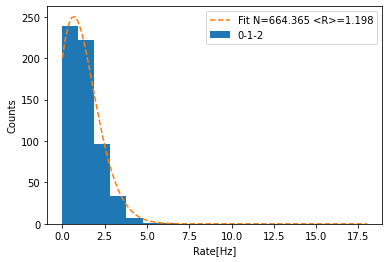

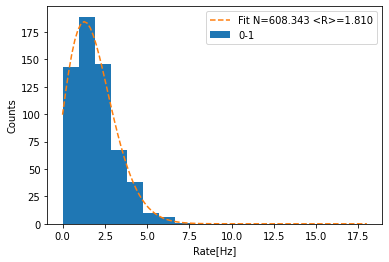

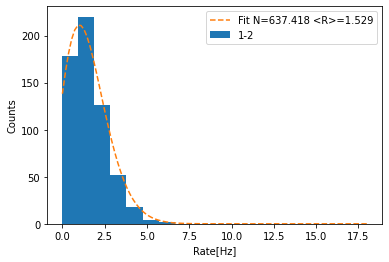

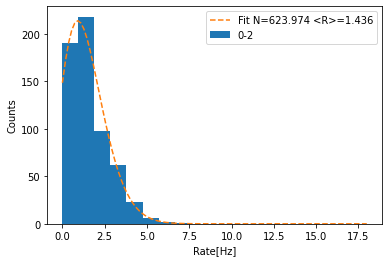

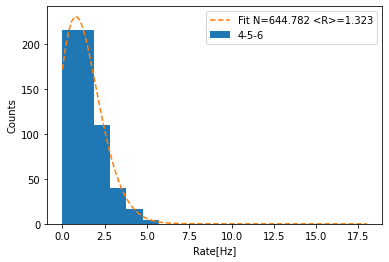

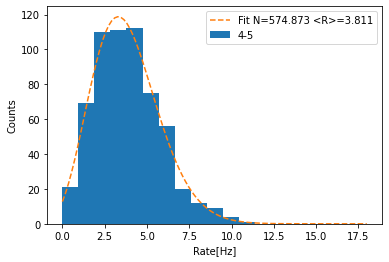

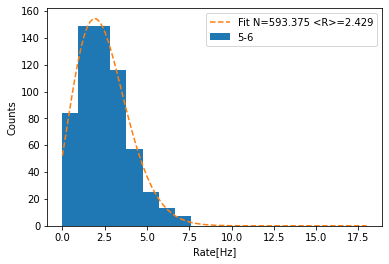

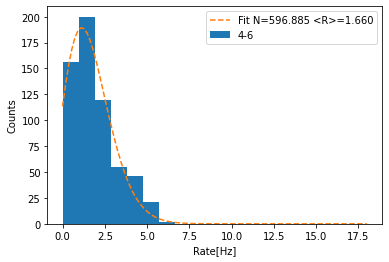

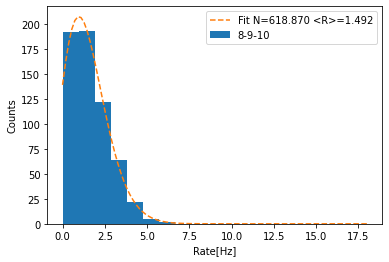

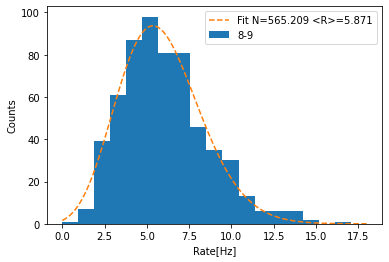

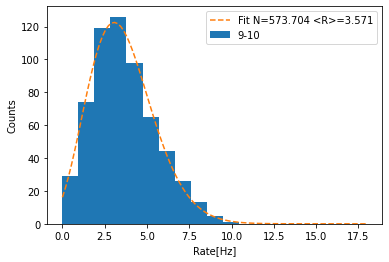

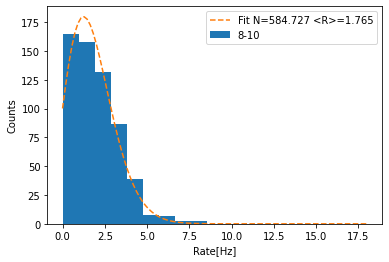

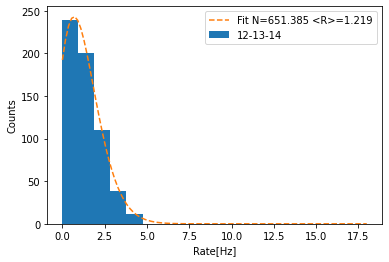

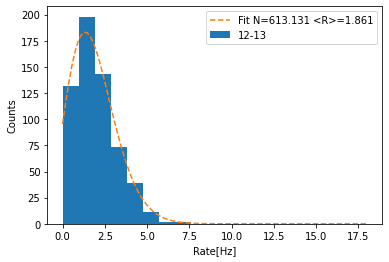

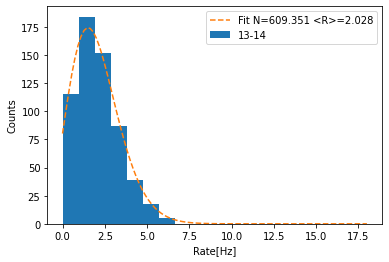

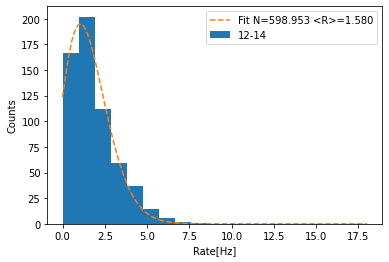

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
for i in range(0,len(labels)):
  binned_rates, bins, _ = plt.hist(data[labels[i]], bins=19, range=(0, 18), label=labels[i])
  centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
  plt.xlabel('Rate[Hz]')
  plt.ylabel('Counts')
  fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[i]].size, mean_rates[labels[i]]])
  plt.plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
  plt.legend()
  plt.show()
  plt.close()
  new_mean_rates.append(fit_pars[1])
  err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

In [ ]:
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[i]))

Rate di coincidenze canali 0-1-2 :	0.917 +/- 0.045 Hz
Rate di coincidenze canali 0-1 :	1.531 +/- 0.055 Hz
Rate di coincidenze canali 1-2 :	1.208 +/- 0.050 Hz
Rate di coincidenze canali 0-2 :	1.223 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	1.054 +/- 0.047 Hz
Rate di coincidenze canali 4-5 :	3.540 +/- 0.080 Hz
Rate di coincidenze canali 5-6 :	2.096 +/- 0.064 Hz
Rate di coincidenze canali 4-6 :	1.490 +/- 0.053 Hz
Rate di coincidenze canali 8-9-10 :	1.236 +/- 0.050 Hz
Rate di coincidenze canali 8-9 :	5.850 +/- 0.099 Hz
Rate di coincidenze canali 9-10 :	3.294 +/- 0.077 Hz
Rate di coincidenze canali 8-10 :	1.557 +/- 0.054 Hz
Rate di coincidenze canali 12-13-14 :	0.951 +/- 0.045 Hz
Rate di coincidenze canali 12-13 :	1.536 +/- 0.056 Hz
Rate di coincidenze canali 13-14 :	1.673 +/- 0.058 Hz
Rate di coincidenze canali 12-14 :	1.435 +/- 0.051 Hz


In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
print("-----------------------------V=900 V, Threshold=-3 mV--------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]**2/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]**2/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

----------------------------------SCHEDA SINISTRA------------------------------------
-----------------------------V=900 V, Threshold=-3 mV--------------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.669 +/- 0.027 (stat)    0.599 +/- 0.022 (fit)       Compatibilità: 2.043sigma
	eff. detector 13 (high)= 0.763 +/- 0.030 (stat)    0.759 +/- 0.032 (fit)       Compatibilità: 0.090sigma
	eff. detector 1 (middle)= 0.874 +/- 0.042 (stat)    0.750 +/- 0.030 (fit)       Compatibilità: 2.415sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.319 +/- 0.009 (stat)    0.298 +/- 0.007 (fit)       Compatibilità: 1.990sigma
	eff. detector 2 (high)= 0.520 +/- 0.017 (stat)    0.503 +/- 0.015 (fit)       Compatibilità: 0.747sigma
	eff. detector 15 (middle)= 0.821 +/- 0.038 (stat)    0.707 +/- 0.025 (fit)       Compatibilità: 2.509sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.228 +/- 0.005 (stat)    0.211 +/- 0.004 (fit)       Compatibilità: 2.693sigma
	eff. detector 

##Analisi presa dati scheda sinistra (presa dati 31/03)

In [ ]:
from scipy.stats import describe
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

def Gaussian(x,N,mu,sig):
  return np.array(N*np.exp(-(x-mu)**2/(2*sig**2))/np.sqrt(2*m.pi*sig**2))

def analysis_rate(file_in, Vth, dt):
  data = leggi_file(file_in)
  labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
  data.columns=[labels[i] for i in range(len(labels))]

  rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
  rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
  rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]


  mean_rates = np.mean(data[labels])
  x = np.linspace(0,18, 100)
  err_rates = []
  new_mean_rates = []
  k=0

  fig,axes=plt.subplots(4,4,sharey=False,figsize=(20,16))
  for i in range(0,4):
    for j in range(0,4):
      if dt > 9:
        x_max_=15
        bins_=23
      else:
        x_max_=18
        bins_=19
      binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=bins_, range=(0,x_max_), label=labels[j+k])
      axes[i,j].set_xlabel('Rate[Hz]')
      axes[i,j].set_ylabel('Counts')
      axes[i,j].grid()

      centered_bins = np.array([(bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
      if dt < 9:
        fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
        axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
      else:
        fit_pars, cov_matrix = fit(Gaussian, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]], rate_std[j+k]*np.sqrt(data[labels[j+k]].size)])
        axes[i,j].plot(x, Gaussian(x, fit_pars[0], fit_pars[1], fit_pars[2]), '--', label="Fit N={:d} <R>={:.3f} sigma={:.3f}".format(int(fit_pars[0]), fit_pars[1], fit_pars[2]))
      axes[i,j].legend(loc='upper right')

      new_mean_rates.append(fit_pars[1])
      err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

    k=k+4

  plt.show()
  plt.close()
  print("\n\n\n")

  triplet_counter = 1
  PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
  PMT_label = ['low', 'high', 'middle']
  print("----------------------------------SCHEDA SINISTRA------------------------------------")
  print("-------------------------V=900 V, Threshold=-{:d} mV, dt={:d} s----------------------------".format(Vth, dt))
  for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        if data[labels[1]].size >=1000:
          print("\teff. detector {} ({})= {:.4f} +/- {:.4f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
        else:
          print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

###Δt=2s, Vth=3mV

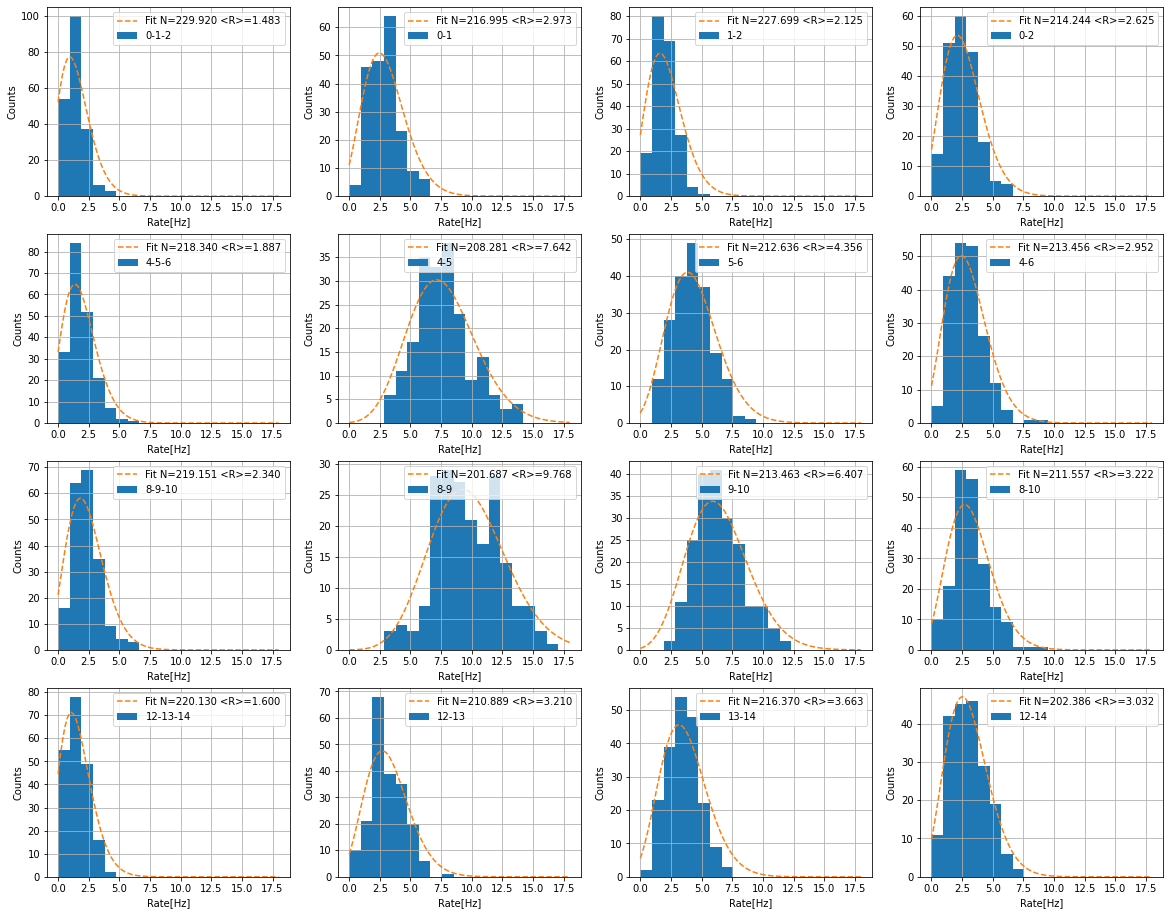





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.500 +/- 0.014 (stat)    0.454 +/- 0.037 (fit)       Compatibilità: 1.174sigma
	eff. detector 13 (high)= 0.641 +/- 0.018 (stat)    0.688 +/- 0.061 (fit)       Compatibilità: 0.749sigma
	eff. detector 1 (middle)= 0.667 +/- 0.022 (stat)    0.523 +/- 0.043 (fit)       Compatibilità: 2.950sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.218 +/- 0.008 (stat)    0.218 +/- 0.014 (fit)       Compatibilità: 0.052sigma
	eff. detector 2 (high)= 0.362 +/- 0.013 (stat)    0.405 +/- 0.027 (fit)       Compatibilità: 1.428sigma
	eff. detector 15 (middle)= 0.617 +/- 0.025 (stat)    0.605 +/- 0.044 (fit)       Compatibilità: 0.224sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.229 +/- 0.007 (stat)    0.217 +/- 0.012 (fit)       Compatibilità: 0.849sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_3mV.dat", 3, 2)

###Δt=10s, Vth=-3mV

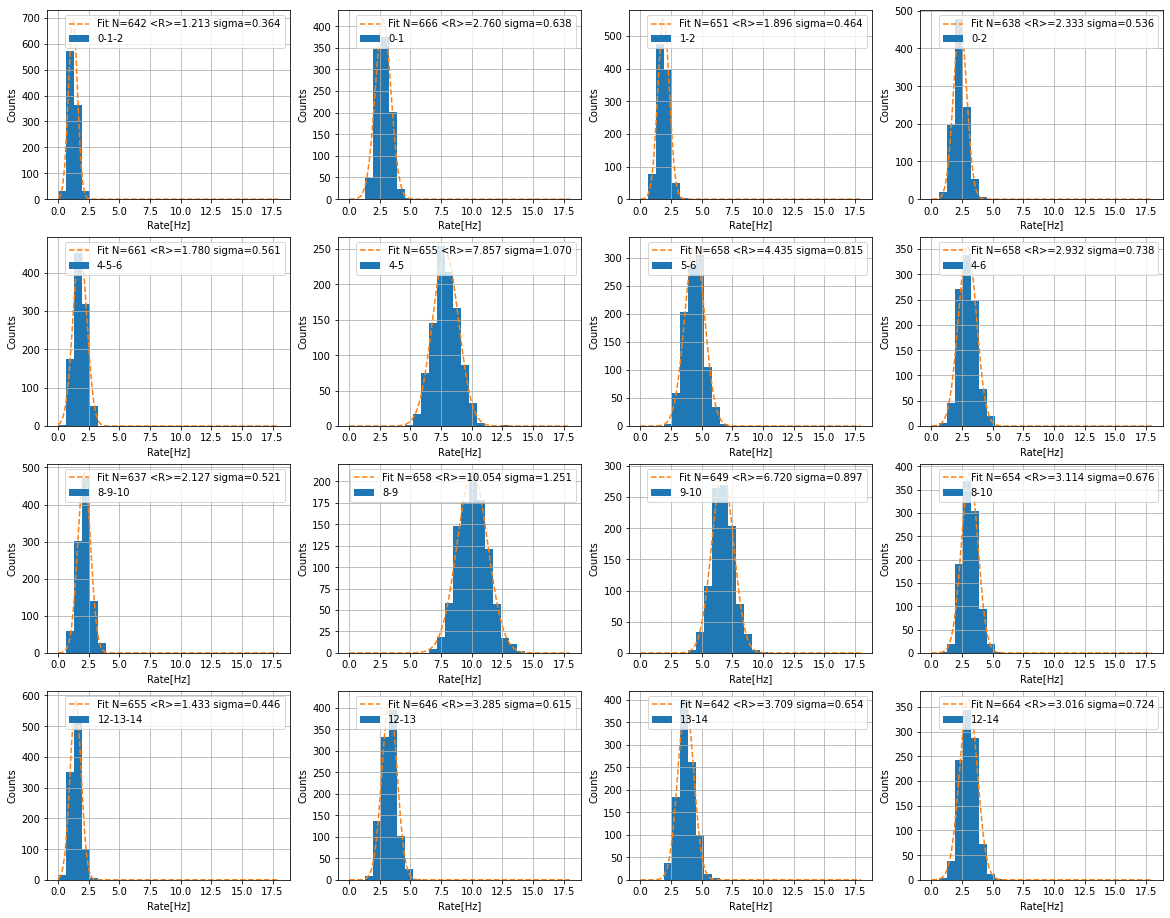





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=10 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.4800 +/- 0.0005 (stat)    0.448 +/- 0.015 (fit)       Compatibilità: 2.130sigma
	eff. detector 13 (high)= 0.6545 +/- 0.0007 (stat)    0.666 +/- 0.024 (fit)       Compatibilità: 0.498sigma
	eff. detector 1 (middle)= 0.6692 +/- 0.0008 (stat)    0.532 +/- 0.018 (fit)       Compatibilità: 7.576sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.2334 +/- 0.0003 (stat)    0.230 +/- 0.006 (fit)       Compatibilità: 0.558sigma
	eff. detector 2 (high)= 0.4145 +/- 0.0005 (stat)    0.409 +/- 0.011 (fit)       Compatibilità: 0.448sigma
	eff. detector 15 (middle)= 0.7179 +/- 0.0011 (stat)    0.607 +/- 0.018 (fit)       Compatibilità: 6.211sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.2484 +/- 0.0003 (stat)    0.213 +/- 0.005 (fit)       Compatibilità: 7.103si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_10s_Vth_3mV.dat",3,10)

###Δt=16s, Vth=-3mV

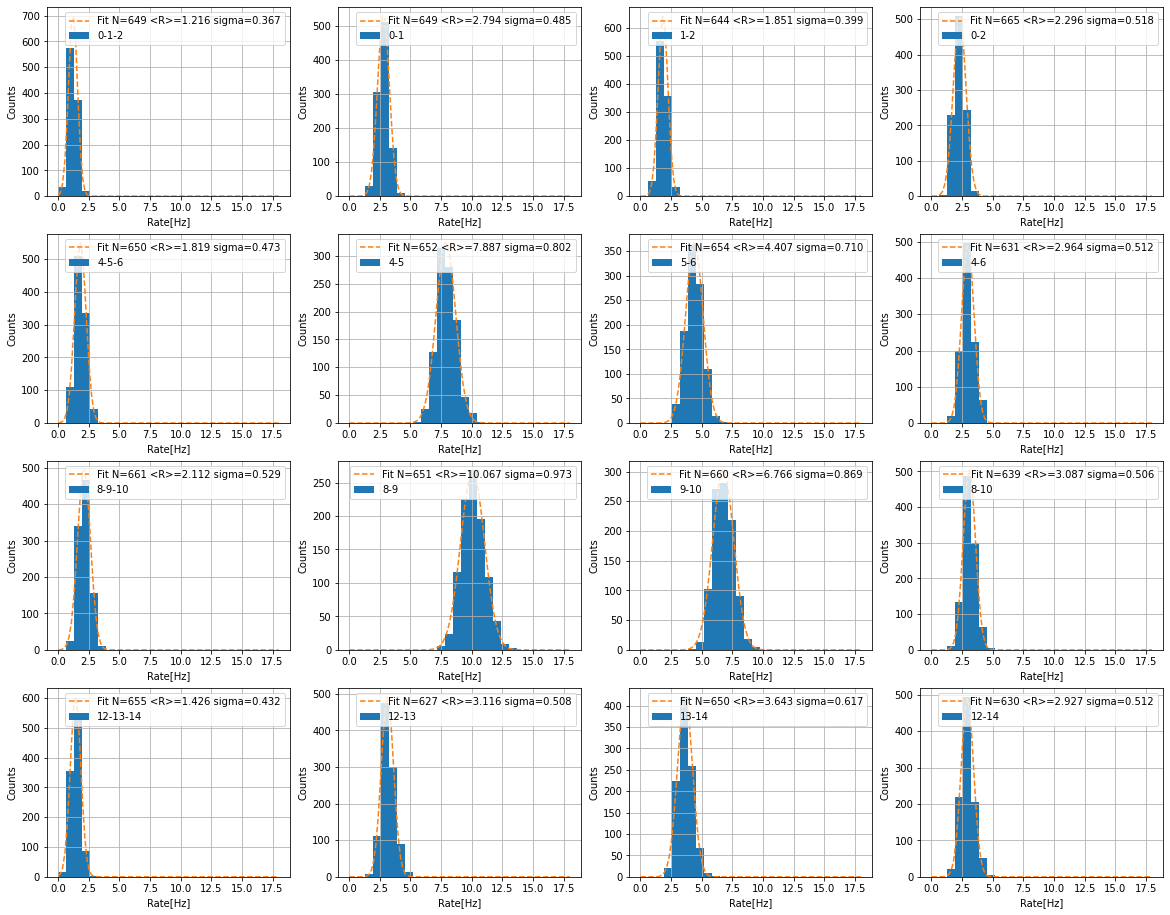





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=16 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.4447 +/- 0.0004 (stat)    0.442 +/- 0.015 (fit)       Compatibilità: 0.185sigma
	eff. detector 13 (high)= 0.5524 +/- 0.0005 (stat)    0.665 +/- 0.024 (fit)       Compatibilità: 4.645sigma
	eff. detector 1 (middle)= 0.5178 +/- 0.0004 (stat)    0.538 +/- 0.019 (fit)       Compatibilità: 1.082sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.1847 +/- 0.0001 (stat)    0.230 +/- 0.006 (fit)       Compatibilità: 7.542sigma
	eff. detector 2 (high)= 0.4112 +/- 0.0004 (stat)    0.412 +/- 0.011 (fit)       Compatibilità: 0.052sigma
	eff. detector 15 (middle)= 0.5913 +/- 0.0005 (stat)    0.606 +/- 0.018 (fit)       Compatibilità: 0.813sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.1883 +/- 0.0001 (stat)    0.211 +/- 0.005 (fit)       Compatibilità: 4.559si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_16s_Vth_3mV.dat",3,16)

### Δt=1 s, Vth=6 mV

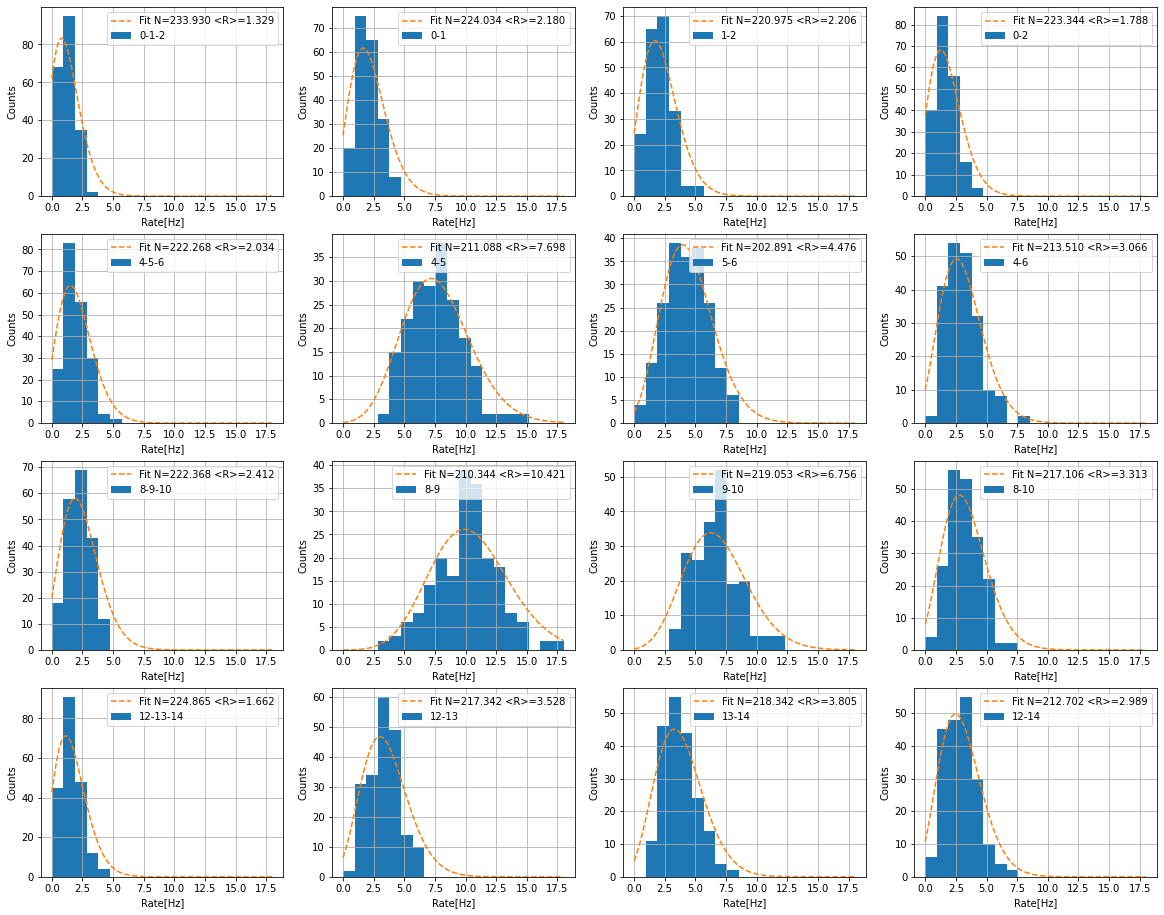





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.605 +/- 0.016 (stat)    0.547 +/- 0.052 (fit)       Compatibilità: 1.063sigma
	eff. detector 13 (high)= 0.652 +/- 0.018 (stat)    0.548 +/- 0.052 (fit)       Compatibilità: 1.885sigma
	eff. detector 1 (middle)= 0.815 +/- 0.024 (stat)    0.681 +/- 0.067 (fit)       Compatibilità: 1.866sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.251 +/- 0.007 (stat)    0.230 +/- 0.014 (fit)       Compatibilità: 1.322sigma
	eff. detector 2 (high)= 0.529 +/- 0.017 (stat)    0.417 +/- 0.028 (fit)       Compatibilità: 3.413sigma
	eff. detector 15 (middle)= 0.718 +/- 0.025 (stat)    0.602 +/- 0.043 (fit)       Compatibilità: 2.341sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.282 +/- 0.006 (stat)    0.205 +/- 0.012 (fit)       Compatibilità: 5.885sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_6mV.dat", 6, 1)

### Δt=2s, Vth=6mV

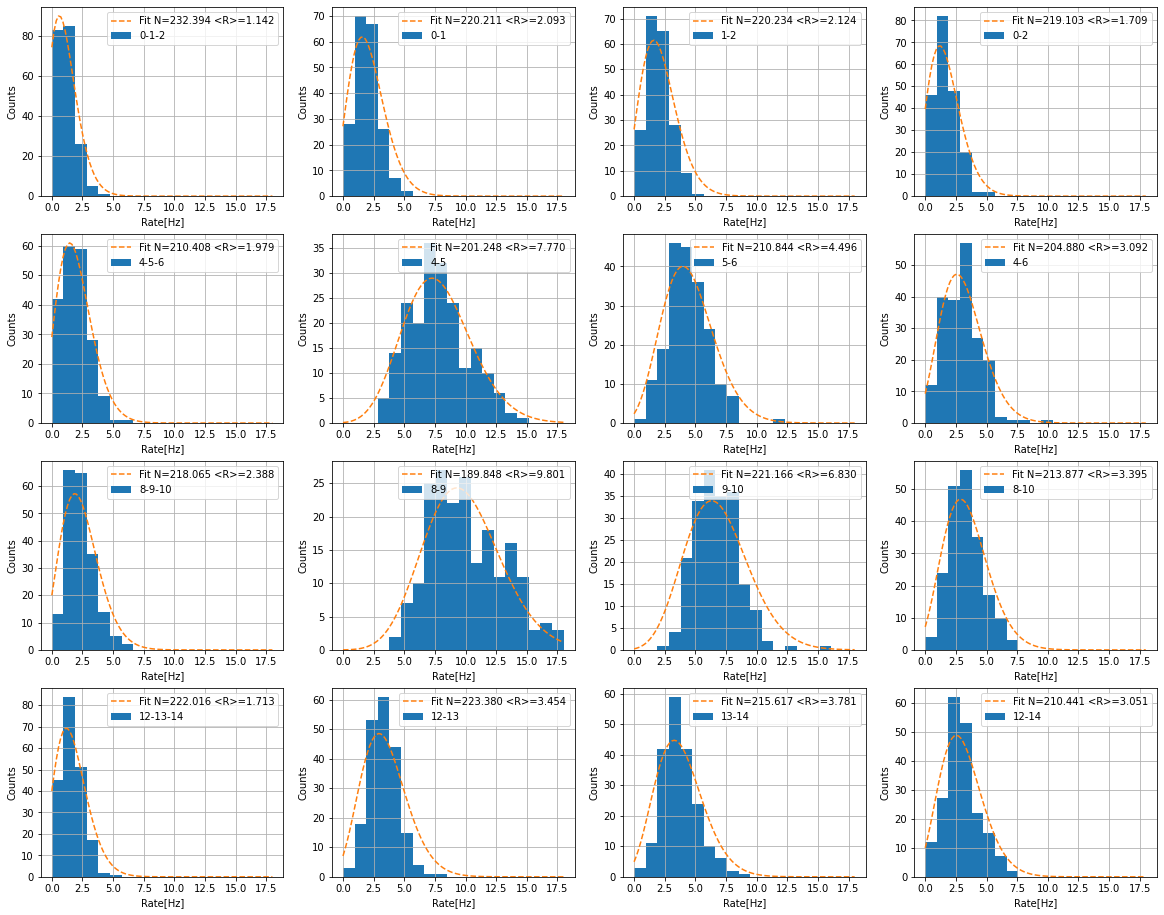





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.576 +/- 0.022 (stat)    0.567 +/- 0.052 (fit)       Compatibilità: 0.149sigma
	eff. detector 13 (high)= 0.537 +/- 0.020 (stat)    0.559 +/- 0.051 (fit)       Compatibilità: 0.394sigma
	eff. detector 1 (middle)= 0.744 +/- 0.030 (stat)    0.683 +/- 0.064 (fit)       Compatibilità: 0.858sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.228 +/- 0.008 (stat)    0.227 +/- 0.014 (fit)       Compatibilità: 0.066sigma
	eff. detector 2 (high)= 0.408 +/- 0.016 (stat)    0.410 +/- 0.027 (fit)       Compatibilità: 0.065sigma
	eff. detector 15 (middle)= 0.718 +/- 0.033 (stat)    0.615 +/- 0.043 (fit)       Compatibilità: 1.911sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.319 +/- 0.009 (stat)    0.215 +/- 0.012 (fit)       Compatibilità: 6.969sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_6mV.dat",6,2)

###Δt=1s, Vth=9mV

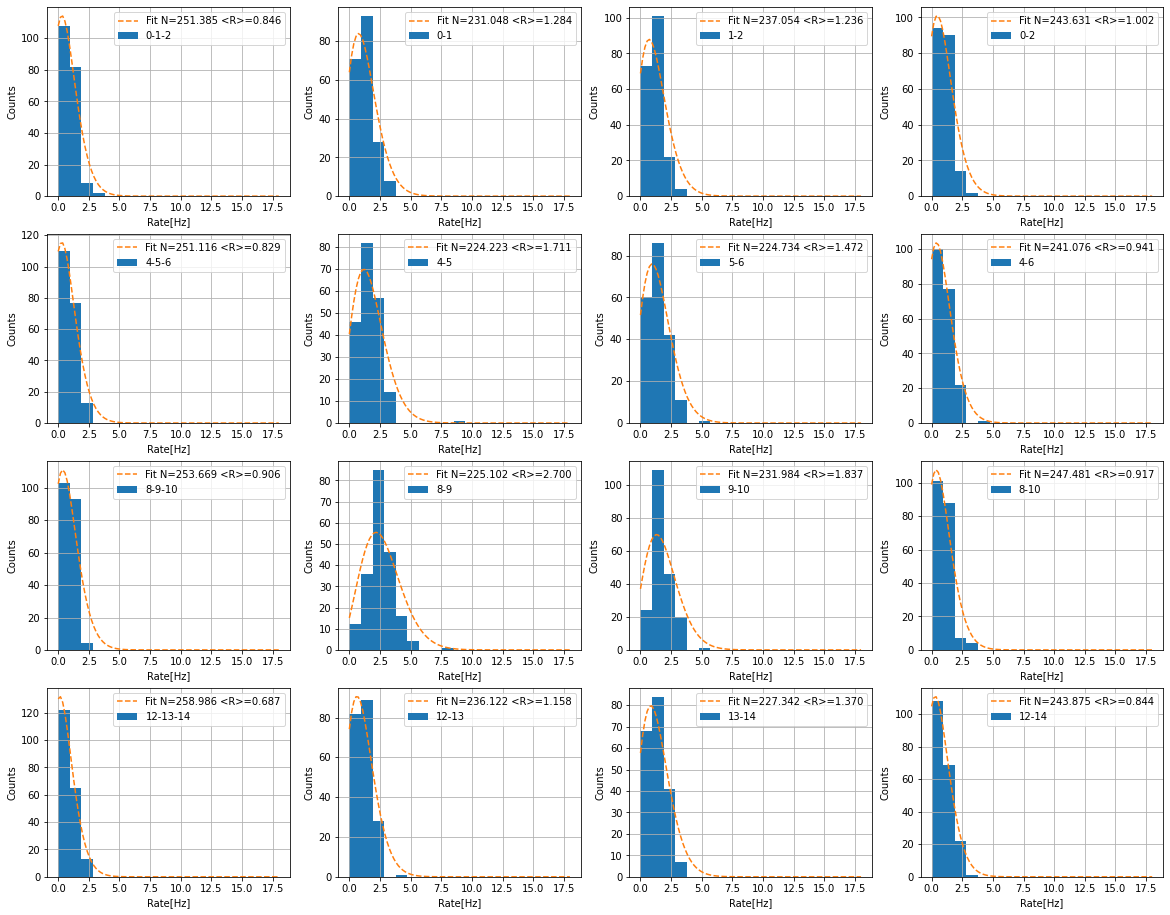





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.709 +/- 0.025 (stat)    0.650 +/- 0.073 (fit)       Compatibilità: 0.757sigma
	eff. detector 13 (high)= 0.754 +/- 0.026 (stat)    0.741 +/- 0.087 (fit)       Compatibilità: 0.140sigma
	eff. detector 1 (middle)= 0.961 +/- 0.037 (stat)    0.850 +/- 0.101 (fit)       Compatibilità: 1.036sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.562 +/- 0.025 (stat)    0.443 +/- 0.050 (fit)       Compatibilità: 2.122sigma
	eff. detector 2 (high)= 0.598 +/- 0.026 (stat)    0.526 +/- 0.062 (fit)       Compatibilità: 1.090sigma
	eff. detector 15 (middle)= 1.031 +/- 0.053 (stat)    0.838 +/- 0.108 (fit)       Compatibilità: 1.609sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.423 +/- 0.011 (stat)    0.308 +/- 0.032 (fit)       Compatibilità: 3.475sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_9mV.dat", 9,1)

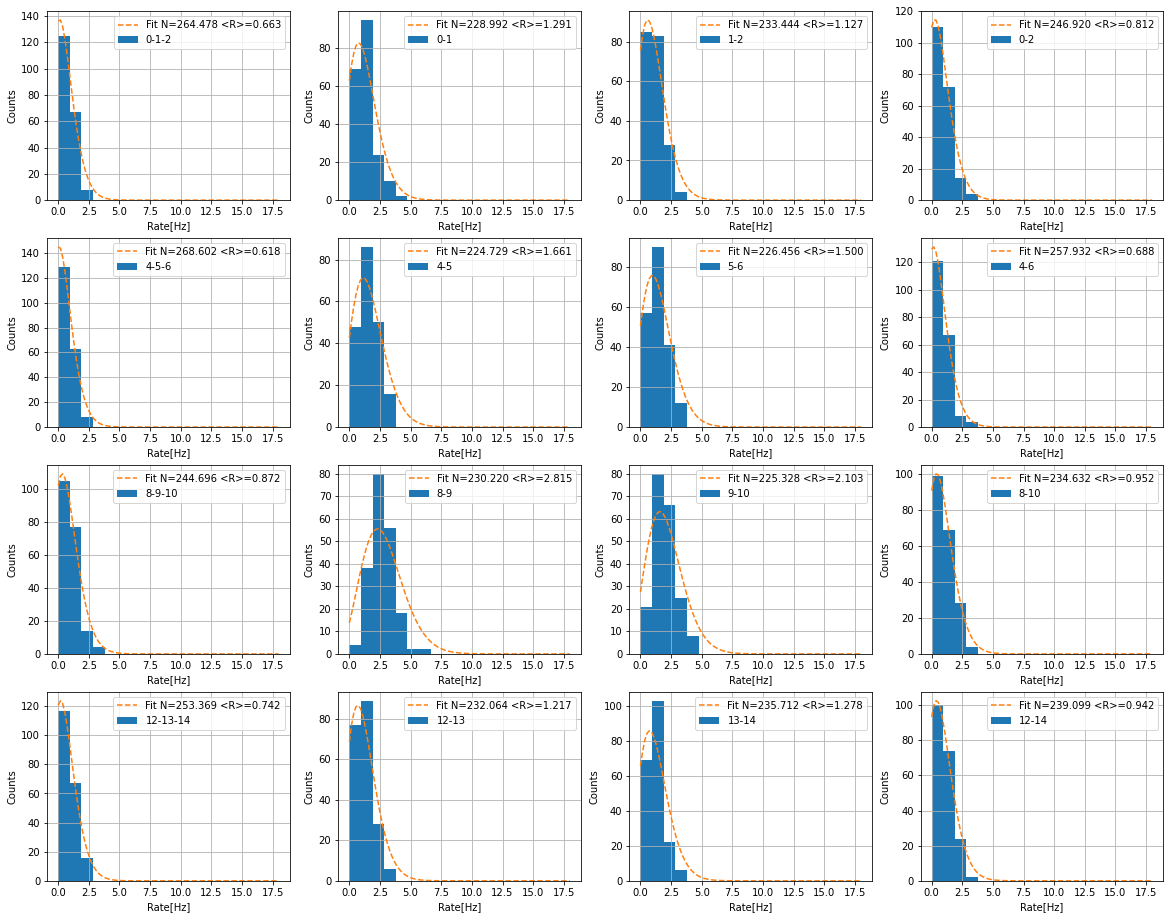





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.774 +/- 0.034 (stat)    0.625 +/- 0.069 (fit)       Compatibilità: 1.931sigma
	eff. detector 13 (high)= 0.684 +/- 0.027 (stat)    0.684 +/- 0.076 (fit)       Compatibilità: 0.001sigma
	eff. detector 1 (middle)= 1.045 +/- 0.049 (stat)    0.874 +/- 0.101 (fit)       Compatibilità: 1.527sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.459 +/- 0.017 (stat)    0.435 +/- 0.048 (fit)       Compatibilità: 0.455sigma
	eff. detector 2 (high)= 0.597 +/- 0.024 (stat)    0.500 +/- 0.057 (fit)       Compatibilità: 1.564sigma
	eff. detector 15 (middle)= 1.138 +/- 0.060 (stat)    0.852 +/- 0.102 (fit)       Compatibilità: 2.408sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.226 +/- 0.008 (stat)    0.323 +/- 0.030 (fit)       Compatibilità: 3.126sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_9mV_revange.dat",9,1)

###Δt=2s, Vth=9mV

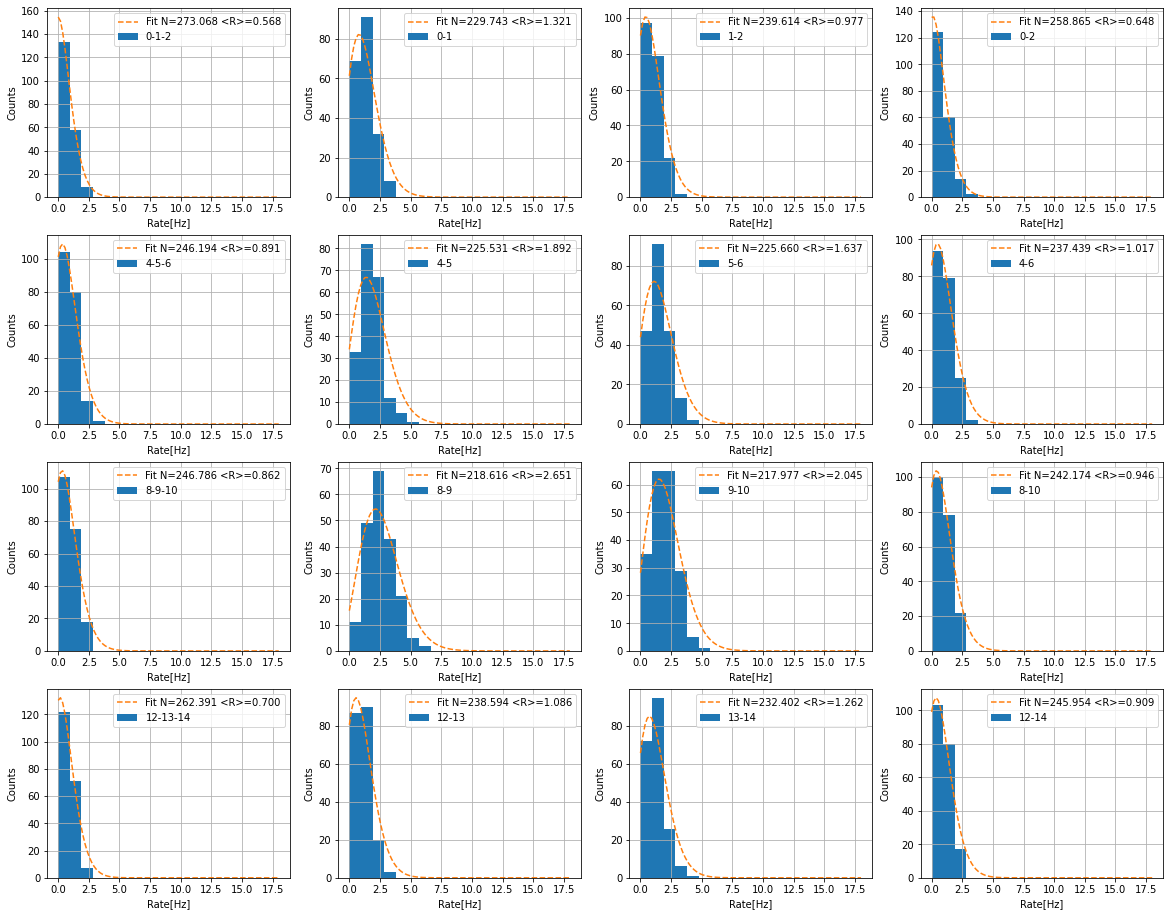





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.575 +/- 0.024 (stat)    0.565 +/- 0.063 (fit)       Compatibilità: 0.153sigma
	eff. detector 13 (high)= 0.753 +/- 0.034 (stat)    0.699 +/- 0.080 (fit)       Compatibilità: 0.629sigma
	eff. detector 1 (middle)= 0.970 +/- 0.048 (stat)    0.877 +/- 0.101 (fit)       Compatibilità: 0.837sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.454 +/- 0.017 (stat)    0.490 +/- 0.050 (fit)       Compatibilità: 0.689sigma
	eff. detector 2 (high)= 0.557 +/- 0.021 (stat)    0.582 +/- 0.062 (fit)       Compatibilità: 0.388sigma
	eff. detector 15 (middle)= 0.849 +/- 0.035 (stat)    0.890 +/- 0.103 (fit)       Compatibilità: 0.378sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.324 +/- 0.012 (stat)    0.308 +/- 0.031 (fit)       Compatibilità: 0.492sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_9mV.dat",9,2)

###Δt=1s, Vth=-15mV

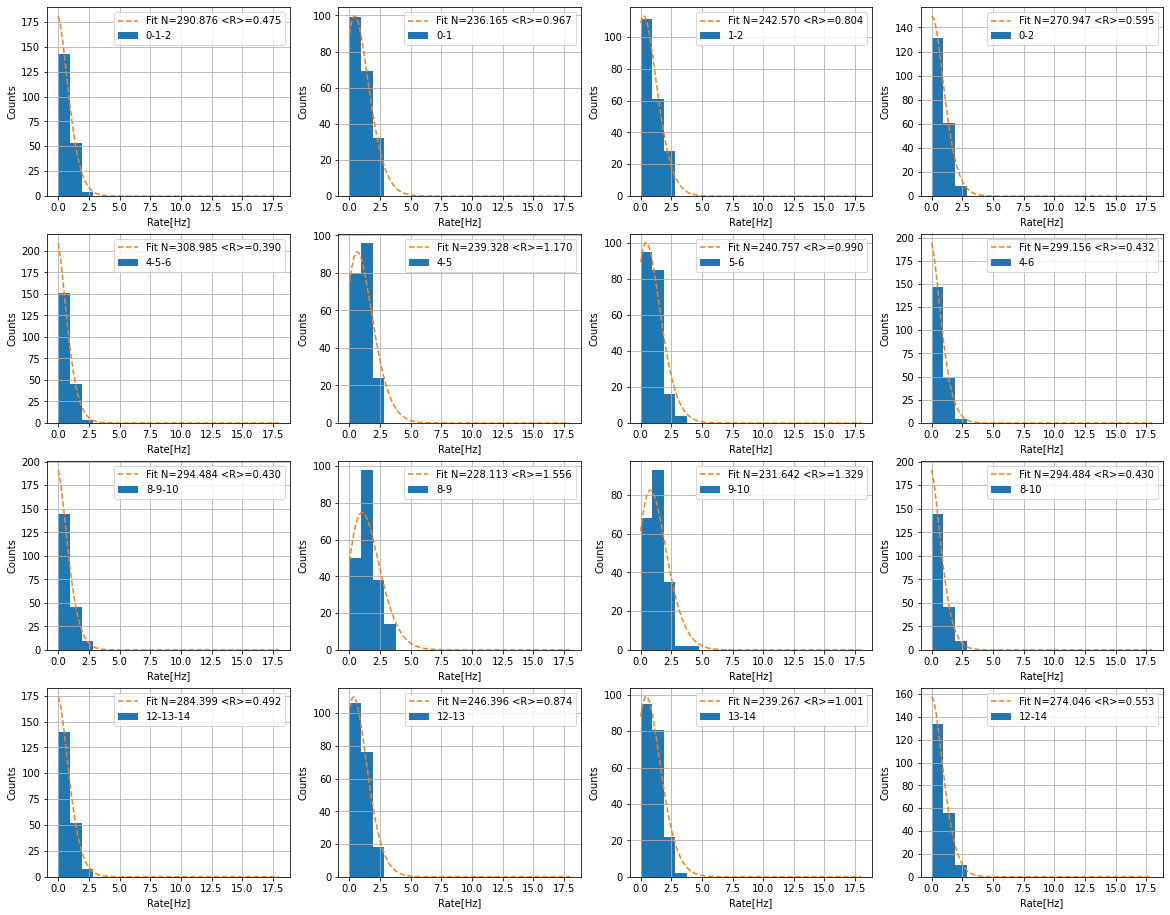





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.669 +/- 0.034 (stat)    0.600 +/- 0.072 (fit)       Compatibilità: 0.858sigma
	eff. detector 13 (high)= 0.869 +/- 0.050 (stat)    0.683 +/- 0.084 (fit)       Compatibilità: 1.903sigma
	eff. detector 1 (middle)= 0.862 +/- 0.043 (stat)    0.872 +/- 0.112 (fit)       Compatibilità: 0.087sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.451 +/- 0.015 (stat)    0.509 +/- 0.059 (fit)       Compatibilità: 0.957sigma
	eff. detector 2 (high)= 0.671 +/- 0.027 (stat)    0.572 +/- 0.068 (fit)       Compatibilità: 1.349sigma
	eff. detector 15 (middle)= 1.010 +/- 0.044 (stat)    0.920 +/- 0.112 (fit)       Compatibilità: 0.747sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.406 +/- 0.015 (stat)    0.428 +/- 0.046 (fit)       Compatibilità: 0.470sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_15mV.dat",15,1)

###Δt=2s,Vth=-15mV

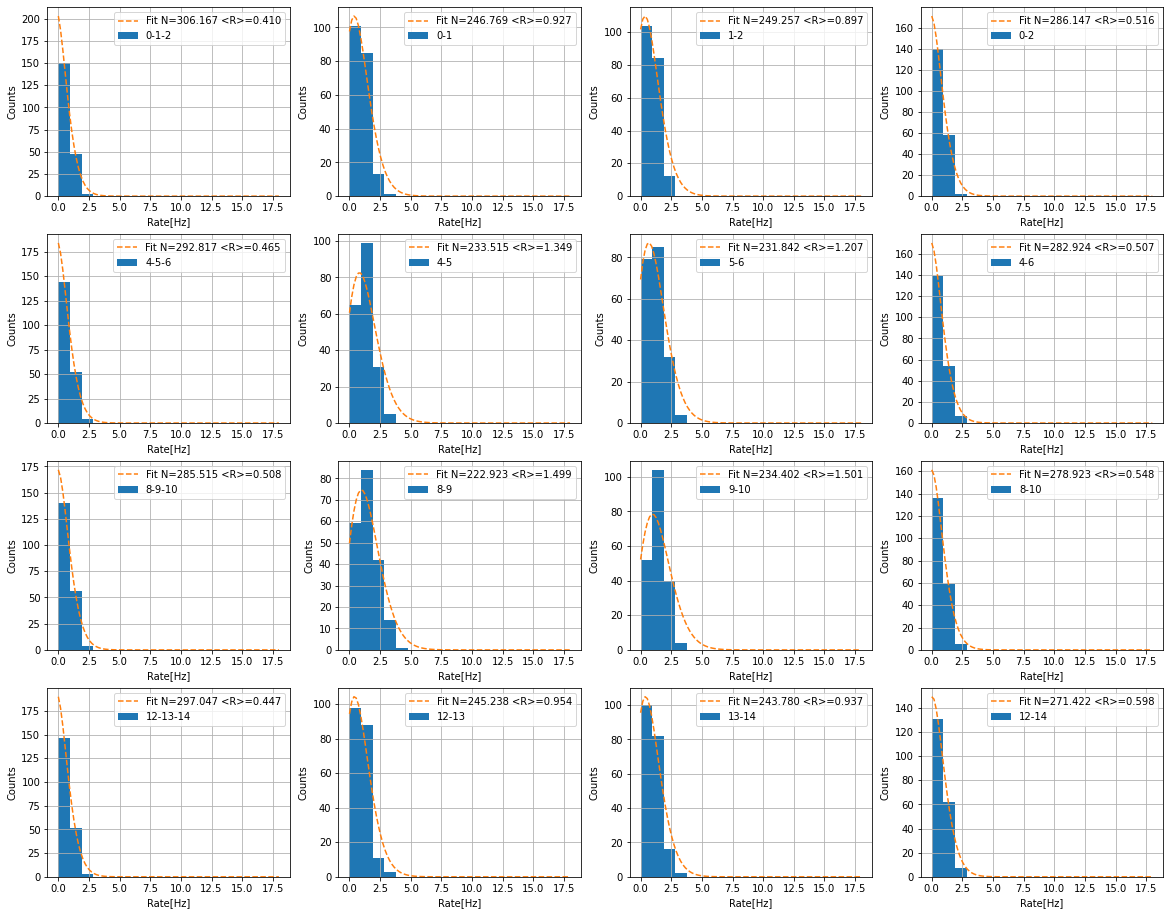





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.653 +/- 0.022 (stat)    0.605 +/- 0.073 (fit)       Compatibilità: 0.627sigma
	eff. detector 13 (high)= 0.722 +/- 0.025 (stat)    0.654 +/- 0.081 (fit)       Compatibilità: 0.792sigma
	eff. detector 1 (middle)= 0.881 +/- 0.031 (stat)    0.908 +/- 0.116 (fit)       Compatibilità: 0.222sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.477 +/- 0.019 (stat)    0.494 +/- 0.058 (fit)       Compatibilità: 0.277sigma
	eff. detector 2 (high)= 0.534 +/- 0.022 (stat)    0.511 +/- 0.060 (fit)       Compatibilità: 0.354sigma
	eff. detector 15 (middle)= 0.985 +/- 0.047 (stat)    0.952 +/- 0.121 (fit)       Compatibilità: 0.258sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.544 +/- 0.019 (stat)    0.424 +/- 0.048 (fit)       Compatibilità: 2.329sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_15mV.dat",15,2)

###Δt=1s,Vth=-20mV

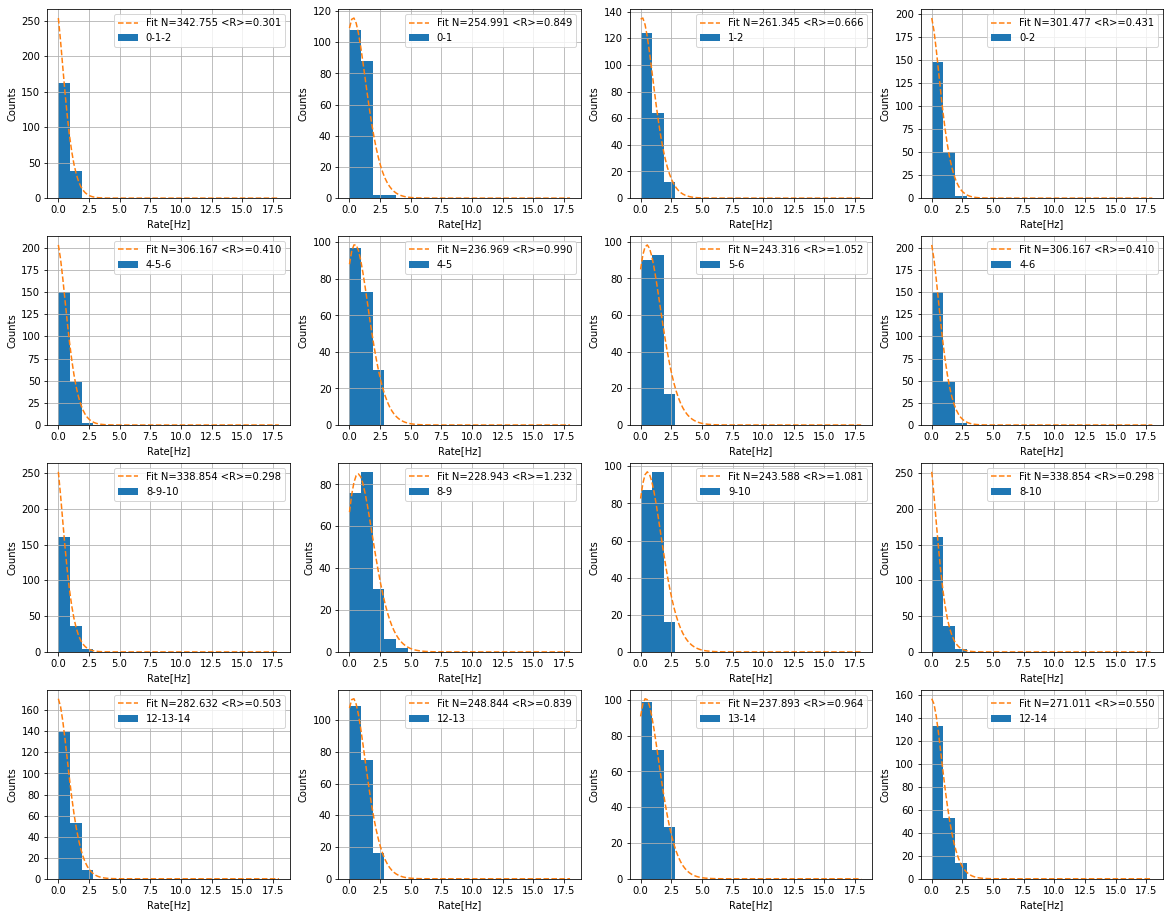





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.636 +/- 0.024 (stat)    0.598 +/- 0.076 (fit)       Compatibilità: 0.479sigma
	eff. detector 13 (high)= 0.671 +/- 0.025 (stat)    0.639 +/- 0.079 (fit)       Compatibilità: 0.389sigma
	eff. detector 1 (middle)= 0.819 +/- 0.032 (stat)    0.817 +/- 0.102 (fit)       Compatibilità: 0.026sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.644 +/- 0.025 (stat)    0.546 +/- 0.064 (fit)       Compatibilità: 1.420sigma
	eff. detector 2 (high)= 0.550 +/- 0.019 (stat)    0.614 +/- 0.077 (fit)       Compatibilità: 0.801sigma
	eff. detector 15 (middle)= 1.031 +/- 0.042 (stat)    1.011 +/- 0.129 (fit)       Compatibilità: 0.147sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.495 +/- 0.023 (stat)    0.403 +/- 0.046 (fit)       Compatibilità: 1.806sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_20mV.dat",20,1)

###Δt=2s,Vth=-20mV

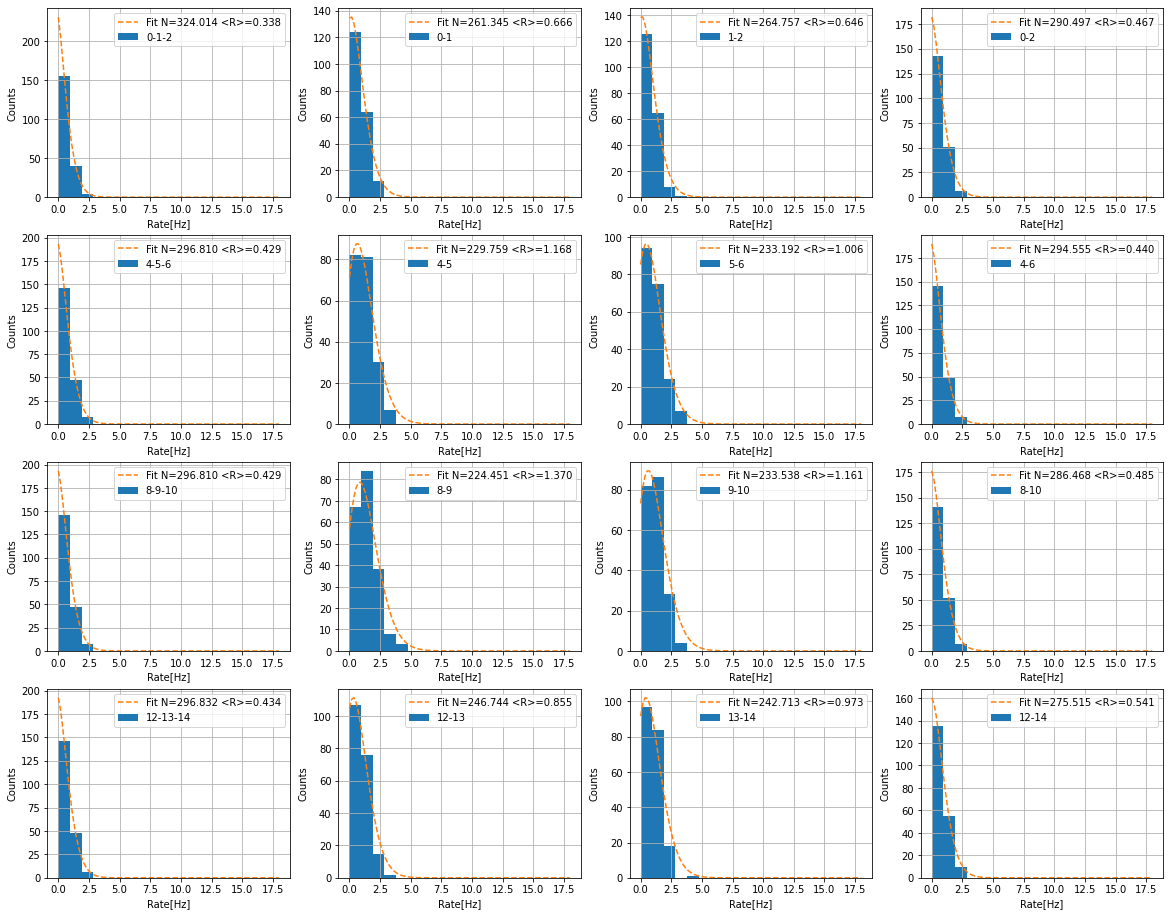





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.641 +/- 0.035 (stat)    0.660 +/- 0.080 (fit)       Compatibilità: 0.214sigma
	eff. detector 13 (high)= 0.681 +/- 0.038 (stat)    0.716 +/- 0.089 (fit)       Compatibilità: 0.369sigma
	eff. detector 1 (middle)= 0.846 +/- 0.050 (stat)    0.850 +/- 0.107 (fit)       Compatibilità: 0.037sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.562 +/- 0.025 (stat)    0.524 +/- 0.058 (fit)       Compatibilità: 0.594sigma
	eff. detector 2 (high)= 0.636 +/- 0.030 (stat)    0.576 +/- 0.064 (fit)       Compatibilità: 0.852sigma
	eff. detector 15 (middle)= 0.952 +/- 0.046 (stat)    0.982 +/- 0.116 (fit)       Compatibilità: 0.245sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.443 +/- 0.022 (stat)    0.417 +/- 0.046 (fit)       Compatibilità: 0.510sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_20mV.dat",20,2)

# Efficienza

## Presa dati 28/03

In [ ]:
def efficienza(file_in,th,nPMT):
  data=leggi_file(file_in)
  data=data.transpose()
  
  k=0
  eff=0

  for i in range(0,len(data.columns),3):
      if(np.min(data[[i]].values)<th and np.min(data[[i+1]].values)<th and np.min(data[[i+2]].values)<th):
        k=k+1
  eff=k/100

  print('Efficienza del PMT{:d} a V=900V con treshold={:.3f} pari a \u03B5={:.2f}'.format(nPMT,th,eff))

In [ ]:
th=[-0.005,-0.010,-0.015,-0.020,-0.025,-0.030]

### Prima tripletta (PMT 13-1-14)

In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH012_30mV.dat"]

print("----------PMT in basso----------")         
for i in range(len(th)):
  efficienza(file_in[i],th[i],14)

----------PMT in basso----------
Efficienza del PMT14 a V=900V con treshold=-0.005 pari a ε=0.66
Efficienza del PMT14 a V=900V con treshold=-0.010 pari a ε=0.69
Efficienza del PMT14 a V=900V con treshold=-0.015 pari a ε=0.70
Efficienza del PMT14 a V=900V con treshold=-0.020 pari a ε=0.71
Efficienza del PMT14 a V=900V con treshold=-0.025 pari a ε=0.61
Efficienza del PMT14 a V=900V con treshold=-0.030 pari a ε=0.50


In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH021_30mV.dat"]

print("----------PMT in mezzo----------")         
for i in range(len(th)):
  efficienza(file_in[i],th[i],1)

----------PMT in mezzo----------
Efficienza del PMT1 a V=900V con treshold=-0.005 pari a ε=0.85
Efficienza del PMT1 a V=900V con treshold=-0.010 pari a ε=0.71
Efficienza del PMT1 a V=900V con treshold=-0.015 pari a ε=0.53
Efficienza del PMT1 a V=900V con treshold=-0.020 pari a ε=0.46
Efficienza del PMT1 a V=900V con treshold=-0.025 pari a ε=0.38
Efficienza del PMT1 a V=900V con treshold=-0.030 pari a ε=0.38


In [ ]:
file_in=["/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_5mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_10mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_15mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_20mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_25mV.dat",
         "/content/drive/MyDrive/SmartAbs 2022/Misure 28 03/CH120_30mV.dat"]

print("----------PMT in alto----------")
         
for i in range(len(th)):
  efficienza(file_in[i],th[i],13)

----------PMT in alto----------
Efficienza del PMT13 a V=900V con treshold=-0.005 pari a ε=0.88
Efficienza del PMT13 a V=900V con treshold=-0.010 pari a ε=0.64
Efficienza del PMT13 a V=900V con treshold=-0.015 pari a ε=0.47
Efficienza del PMT13 a V=900V con treshold=-0.020 pari a ε=0.38
Efficienza del PMT13 a V=900V con treshold=-0.025 pari a ε=0.36
Efficienza del PMT13 a V=900V con treshold=-0.030 pari a ε=0.37


## Presa dati 31/03

In [ ]:
def efficienza(file_in,th,ntripletta):
  
  data=leggi_file(file_in)
  data=data.transpose()
  
  j=0
  k=0
  eff=0
  err=0

  for i in range(0+3*(ntripletta-1),len(data.columns),12):
      if(np.min(data[[i]].values)<-0.020 and np.min(data[[i+1]].values)<-0.020):
        j=j+1
        #print(data[[i]].values,data[[i+1]].values)
        if(np.min(data[[i+2]].values)<th):
          k=k+1
  if(j==0):
    eff=0
  else:
    eff=k/j
  err=np.sqrt((eff*(1-eff))/(j))

  print('Efficienza del PMT della tripletta {:d} a V=900V con treshold={:.3f}V e {:d} eventi pari a \u03B5={:.3f}+/-{:.3f}'.format(ntripletta,th,j,eff,err))

### Scheda sinistra

#### PMT down

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 435 eventi pari a ε=0.936+/-0.012
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 435 eventi pari a ε=0.883+/-0.015
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 435 eventi pari a ε=0.791+/-0.020
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 435 eventi pari a ε=0.687+/-0.022
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 435 eventi pari a ε=0.651+/-0.023
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 519 eventi pari a ε=0.906+/-0.013
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 519 eventi pari a ε=0.811+/-0.017
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 519 eventi pari a ε=0.696+/-0.020
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 519 eventi pari a ε=0.593+/-0.022
Efficie

#### PMT middle

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 500 eventi pari a ε=1.000+/-0.000
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 500 eventi pari a ε=0.992+/-0.004
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 500 eventi pari a ε=0.990+/-0.004
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 500 eventi pari a ε=0.972+/-0.007
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 500 eventi pari a ε=0.944+/-0.010
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 475 eventi pari a ε=0.996+/-0.003
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 475 eventi pari a ε=0.996+/-0.003
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 475 eventi pari a ε=0.994+/-0.004
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 475 eventi pari a ε=0.987+/-0.005
Efficie

#### PMT top

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 374 eventi pari a ε=0.925+/-0.014
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 374 eventi pari a ε=0.896+/-0.016
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 374 eventi pari a ε=0.845+/-0.019
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 374 eventi pari a ε=0.741+/-0.023
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 374 eventi pari a ε=0.706+/-0.024
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 559 eventi pari a ε=0.902+/-0.013
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 559 eventi pari a ε=0.818+/-0.016
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 559 eventi pari a ε=0.737+/-0.019
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 559 eventi pari a ε=0.610+/-0.021
Efficie

## Stima intervallo temporale

In [473]:
def time(file_in,n_tripletta,pos,treshold):
  data=leggi_file(file_in)
  data=data.transpose()
  t_top=[]
  t_middle=[]
  t_bottom=[]
  for i in range(3*(n_tripletta-1),len(data.columns),12):
    picco_top=np.min(data[i])
    picco_middle=np.min(data[i+1])
    picco_bottom=np.min(data[i+2])
    if(picco_top<-0.020 and picco_middle<-0.020 and picco_bottom<-0.020):
      k_t=0
      k_m=0
      k_b=0
      for j in range(len(data.index)):
        if(data[i][j]<0.3*picco_top and k_t==0):
          t_top.append(((j+(j-1))/2))
          k_t=1
        if(data[i+1][j]<0.3*picco_middle and k_m==0):
          t_middle.append(((j+(j-1))/2))  
          k_m=1
        if(data[i+2][j]<0.3*picco_bottom and k_b==0):
          t_bottom.append(((j+(j-1))/2))
          k_b=1
  t_mean=[(x+y)/2 for x,y in zip(t_top,t_middle)]
  delta_t=[np.abs((x-y))*0.3125 for x,y in zip(t_mean,t_bottom)]
  return(delta_t)

In [460]:
def flatten(t):
    return [item for sublist in t for item in sublist]

### PMT bottom

In [459]:
delta_t_bottom=[]
for i in range(1,5):
  delta_t_bottom.append(time("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",i,'bottom'))

In [462]:
delta_t_bottom=flatten(delta_t_bottom)

TypeError: ignored

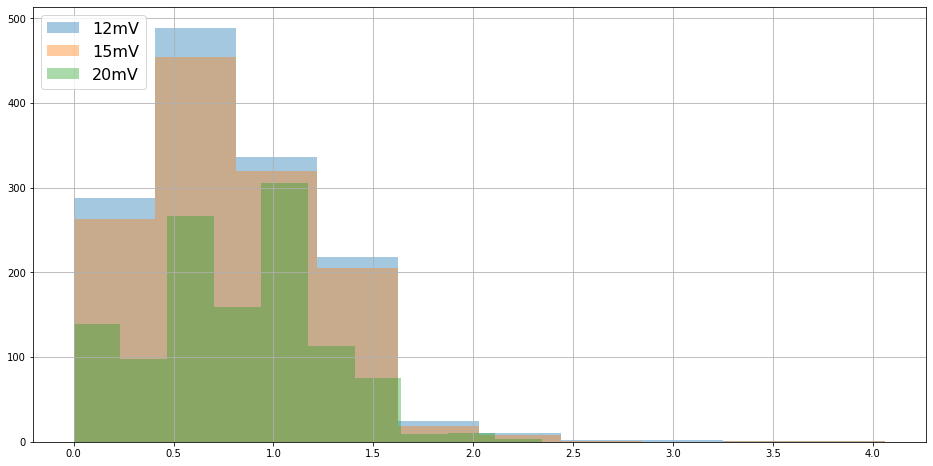

In [472]:
plt.figure(figsize=(16,8))
plt.grid()
plt.hist(delta_t_bottom,bins=20,color='blue',alpha=0.8)
plt.show()

### PMT middle

In [450]:
delta_t_middle=[]
for i in range(1,5):
  delta_t_middle.append(time("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",i,'middle'))

In [451]:
delta_t_middle=flatten(delta_t_middle)

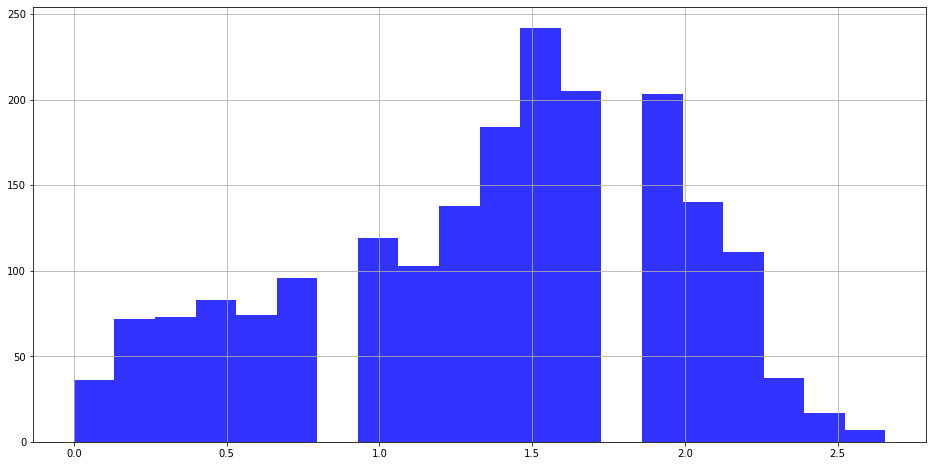

In [452]:
plt.figure(figsize=(16,8))
plt.grid()
plt.hist(delta_t_middle,bins=20,color='blue',alpha=0.8)
plt.show()

### PMT top

In [453]:
delta_t_top=[]
for i in range(1,5):
  delta_t_top.append(time("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",i,'top'))

In [454]:
delta_t_top=flatten(delta_t_top)

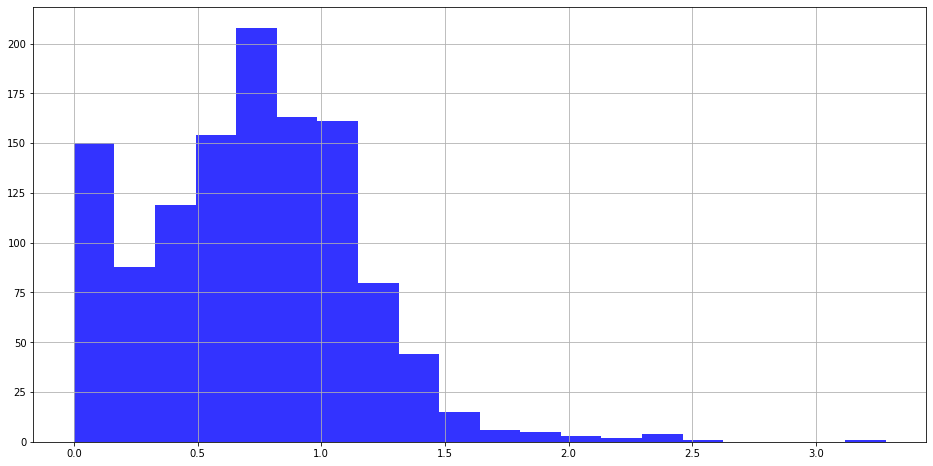

In [455]:
plt.figure(figsize=(16,8))
plt.grid()
plt.hist(delta_t_top,bins=20,color='blue',alpha=0.8)
plt.show()

### Totale

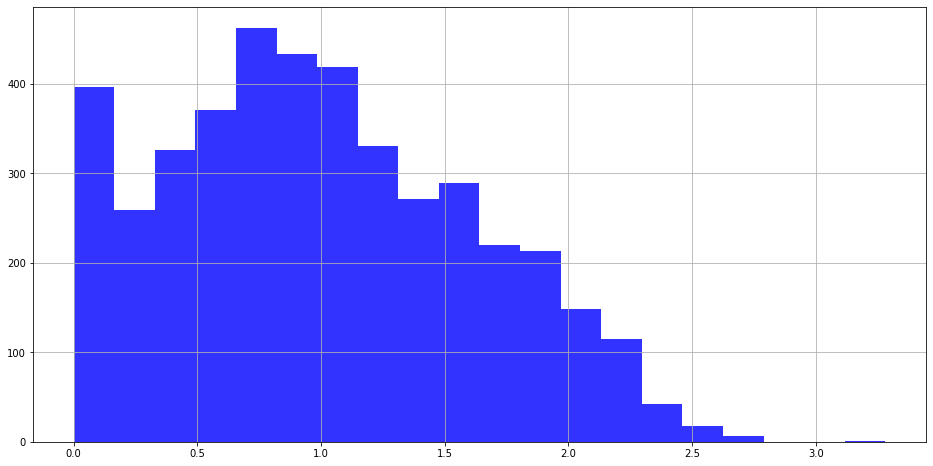

In [456]:
delta_t=delta_t_bottom+delta_t_middle+delta_t_top
plt.figure(figsize=(16,8))
plt.grid()
plt.hist(delta_t,bins=20,color='blue',alpha=0.8)
plt.show()

In [ ]:
t_top=[]
t_middle=[]
t_bottom=[]

for i in range(0,len(data.columns),12):
  picco_top=np.min(data[i])
  picco_middle=np.min(data[i+1])
  picco_bottom=np.min(data[i+2])
  if(picco_top<-0.020 and picco_middle<-0.020 and picco_bottom<-0.020):
    k_t=0
    k_m=0
    k_b=0
    for j in range(len(data.index)):
       if(data[i][j]<0.3*picco_top and k_t==0):
        t_top.append(((j+(j-1))/2))
        k_t=1
       if(data[i+1][j]<0.3*picco_middle and k_m==0):
        t_middle.append(((j+(j-1))/2))  
        k_m=1
       if(data[i+2][j]<0.3*picco_bottom and k_b==0):
        t_bottom.append(((j+(j-1))/2))
        k_b=1

In [ ]:
t_mean=[(x+y)/2 for x,y in zip(t_top,t_middle)]
delta_t=[(x-y)*0.3125 for x,y in zip(t_mean,t_bottom)]
times=pd.DataFrame({'Tempo top':t_top,'Tempo middle':t_middle,'Tempo media':t_mean,'Tempo bottom':t_bottom,'Delta t [ns]':delta_t})
times

,Tempo top,Tempo middle,Tempo media,Tempo bottom,Delta t [ns]
0,825.5,820.5,823.0,824.5,-0.46875
1,822.5,816.5,819.5,823.5,-1.25000
2,822.5,828.5,825.5,822.5,0.93750
3,823.5,823.5,823.5,823.5,0.00000
4,811.5,817.5,814.5,812.5,0.62500
...,...,...,...,...,...
278,818.5,815.5,817.0,818.5,-0.46875
279,816.5,823.5,820.0,816.5,1.09375
280,816.5,810.5,813.5,815.5,-0.62500
281,825.5,819.5,822.5,825.5,-0.93750


In [ ]:
from scipy.stats import describe
describe(delta_t)

DescribeResult(nobs=283, minmax=(-2.03125, 2.1875), mean=-0.020980565371024735, variance=0.712067951305353, skewness=-0.13640076775653392, kurtosis=-1.0588042125593649)

In [ ]:
for i in range(0,len(data.columns),3):
  if(np.min(data[i])<-0.020 and np.min(data[i+1])<-0.020 and np.min(data[i+2])<-0.020):
    print(i)

0
12
39
123
201
210
225
240
279
297
303
351
381
405
408
420
453
465
468
483
507
522
528
558
591
615
624
654
669
699
738
765
768
789
801
831
870
894
909
912
924
945
963
978
1002
1017
1026
1038
1056
1077
1089
1107
1119
1134
1149
1158
1164
1176
1191
1233
1242
1254
1260
1278
1335
1350
1356
1413
1422
1437
1446
1461
1509
1530
1593
1599
1611
1626
1665
1668
1683
1698
1725
1728
1743
1782
1806
1827
1857
1878
1887
1905
1953
1959
1971
1989
1998
2025
2031
2043
2139
2184
2217
2223
2265
2271
2280
2298
2313
2322
2349
2355
2367
2388
2400
2418
2424
2445
2451
2484
2496
2520
2535
2544
2577
2586
2592
2613
2637
2655
2682
2733
2769
2817
2835
2874
2886
2898
2907
2919
2940
2952
2979
2994
3012
3030
3045
3060
3081
3090
3096
3126
3141
3165
3192
3216
3303
3312
3324
3345
3348
3375
3390
3426
3438
3444
3459
3474
3501
3534
3546
3597
3603
3615
3639
3648
3663
3687
3711
3726
3732
3777
3849
3858
3864
3876
3894
3906
3948
3969
3996
4014
4023
4038
4104
4134
4149
4194
4200
4230
4239
4254
4278
4341
4362
4395
4407
4416
4428
447

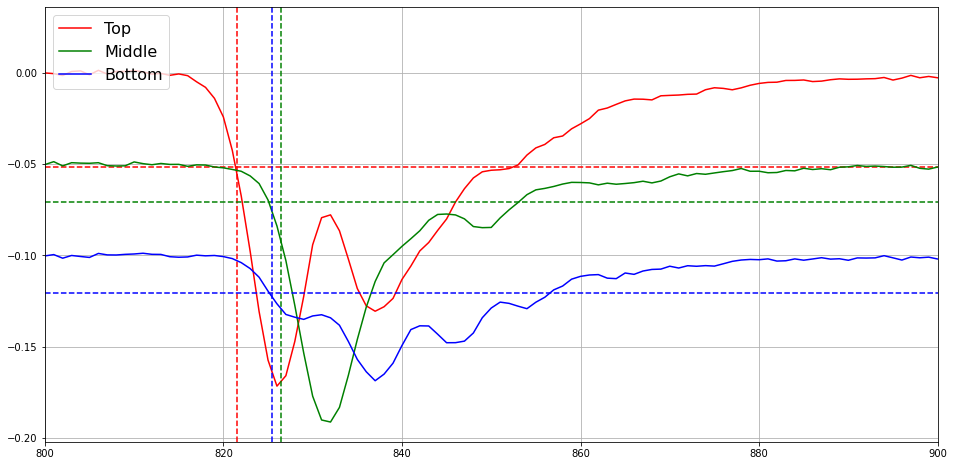

In [ ]:
x=np.arange(0,1024,1)

plt.figure(figsize=(16,8))
plt.xlim(800,900)
plt.grid()

plt.plot(x,data[23976].values,color='red',label='Top')
plt.axvline(x=821.5,linestyle='--',color='red')
plt.axhline(np.min(data[23976])*0.3,linestyle='--',color='red')

plt.plot(x,data[23977].values-0.05,color='green',label='Middle')
plt.axvline(x=826.5,linestyle='--',color='green')
plt.axhline(np.min(data[23978])*0.3-0.05,linestyle='--',color='green')

plt.plot(x,data[23978].values-0.10,color='blue',label='Bottom')
plt.axvline(x=825.5,linestyle='--',color='blue')
plt.axhline(np.min(data[23978])*0.3-0.10,linestyle='--',color='blue')
plt.legend(loc=2,prop={'size':16})

# Grafici rate (visualizzazione più comoda)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
k=0

fig,axes=plt.subplots(4,4,sharey=False,figsize=(20,16))

for i in range(0,4):
  for j in range(0,4):
    binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=19, range=(0, 18), label=labels[j+k])
    axes[i,j].set_xlabel('Rate[Hz]')
    axes[i,j].set_ylabel('Counts')
    axes[i,j].grid()

    centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
    fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
    axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
    axes[i,j].legend(loc=4)

    new_mean_rates.append(fit_pars[1])
    err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

  k=k+4

plt.show()
plt.close()
  

#Monte Carlo per fattore geometrico

In [ ]:
from scipy.stats import describe

def segment(x,start, end):
  return np.array([start[0]+(end-start)[0]*x, start[1]+(end-start)[1]*x, start[2]+(end-start)[2]*x])

def conditions(x,x_min,x_max):
  test = [(x_min<x[i]<x_max) for i in range(x.size)]
  if np.any(test):
    return True
  else:
    return False

def draw(x):
  index = np.arange(n_points)
  extr = np.random.choice(index, 2, replace=False)
  return np.array([x[extr[0]], x[extr[1]]])

def check_trajectory(x, start, end):
  rays = segment(x, start, end)
  C_up=0
  C_middle=0
  C_down=0
  C_up_down=0
  C_middle_down=0
  C_middle_up=0
  C_all=0
  counts = []
  for j in range(x.size):
    check_x = -1.25 < rays[0][j] < 1.25
    check_y = -14.65 < rays[1][j] < 14.65
    check_z = -3.75 < rays[2][j] < 3.75
    if np.any(check_x, where=True):
      if np.any(check_y, where=True):
        if np.any(check_z, where=True):
          if conditions(rays[2], -3.75, -1.25): #barra inferiore
            C_down = C_down + 1
            if conditions(rays[2], -1.25, 1.25):
              C_middle_down = C_middle_down + 1
              if conditions(rays[2], 1.25, 3.75):
                C_all = C_all + 1
          if conditions(rays[2], -1.25, 1.25): #barra intermedia
            C_middle = C_middle + 1 
            if conditions(rays[2], 1.25, 3.75):
              C_middle_up =C_middle_up + 1
          if conditions(rays[2], 1.25, 3.75): #barra superiore
            C_up = C_up +1
            if conditions(rays[2], -3.75, -1.25):
              C_up_down = C_up_down + 1
  counts.append([C_up, C_middle, C_down, C_middle_down, C_middle_up, C_up_down, C_all])
  return counts


n_points = 100000
random=np.random.uniform(size=(n_points,3))
points=np.array(-30 + 60*random)
x = np.linspace(0,1,100)
counts = []
rep = []

In [ ]:
for j in range(0,100):
  for i in range(10000):
    in_end_tracks = draw(points)
    x_start = in_end_tracks[0]
    x_stop = in_end_tracks[1]
    counts.append(check_trajectory(x, x_start, x_stop))
  sum_counts=np.sum(np.array(counts), axis=0).flatten()
  rep.append(sum_counts)
  print("Run n°{:} ended".format(j+1))

Run n°1 ended
Run n°2 ended
Run n°3 ended
Run n°4 ended
Run n°5 ended


In [ ]:
def pairs(a,b):
  line = []
  for i in range(a.size):
    line.append([a[i],b[i]])
  return np.array(line).flatten()

stats = describe(rep)
mean_counts = stats[2]
std_counts = np.sqrt(stats[3]/stats[0])

c_err_up = np.sqrt((mean_counts[3]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[3]/mean_counts[6])**2)
c_err_middle =np.sqrt((mean_counts[5]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[5]/mean_counts[6])**2)
c_err_down = np.sqrt((mean_counts[4]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[4]/mean_counts[6])**2)



lines = np.array([ pairs(mean_counts, std_counts) for i in range(stats[0])])
lines.flatten()
np.savetxt("/content/drive/MyDrive/SmartAbs 2022/Simulazione fattore geometrico/valori_medi_conteggi_100rip_10000punti.dat", lines)

In [ ]:
print("Fattore di correzione barra superiore: Corr_up = {:.3f} +/- {:.3f}".format(mean_counts[3]/mean_counts[6], c_err_up))
print("Fattore di correzione barra interemedia: Corr_middle = {:.3f} +/- {:.3f}".format(mean_counts[5]/mean_counts[6], c_err_middle))
print("Fattore di correzione barra inferiore: Corr_down = {:.3f} +/- {:.3f}".format(mean_counts[4]/mean_counts[6], c_err_down))

Fattore di correzione barra superiore: Corr_up = 1.083 +/- 0.195
Fattore di correzione barra interemedia: Corr_middle = 1.000 +/- 0.180
Fattore di correzione barra inferiore: Corr_down = 1.087 +/- 0.196
